# An Analysis Through Data Visualizations

This file will explore the **relationship** between **each column** and **Weekly Sales**. Additionally it will attempt to establish if the **occurence** of a **Holiday** affects **Weekly Sales**.

**Importing** neccessary libraries

In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
import statsmodels.api as sm
import matplotlib.dates as mdates
import scipy.stats as stats




**Importing** the **Visualization Dataframe**

In [463]:
df = pd.read_csv('visual_df.csv', parse_dates=['Date'])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Season,Holiday_Name
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,Spring,No Holiday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,Fall,Super Bowl
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,Winter,No Holiday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,Winter,No Holiday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,Spring,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,Fall,No Holiday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,Spring,No Holiday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,Fall,No Holiday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,Fall,No Holiday


## Visualizations involving **Store Number** 

**Average Weekly Sales** for the **Top 5** and **Bottom 5** Stores

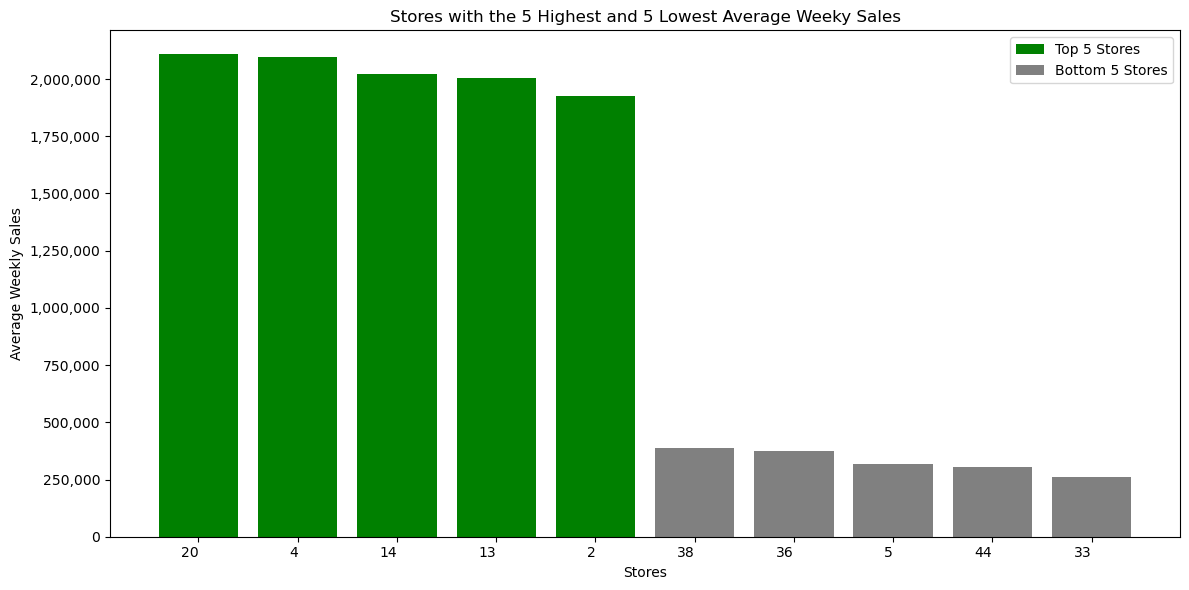

In [464]:
# Calculate average sales for each store
average_sales = df.groupby('Store')['Weekly_Sales'].mean()

# Get the top 5 and bottom 5 stores based on average sales
top_stores = average_sales.nlargest(5).index
bottom_stores = average_sales.nsmallest(5).sort_values(ascending=False).index

# Retrieve the average sales values for top and bottom stores
top_sales = average_sales.loc[top_stores]
bottom_sales = average_sales.loc[bottom_stores]

# Create the figure and subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Set the positions of the bars on the x-axis
x = np.arange(len(top_stores) + len(bottom_stores))

# Plot the top 5 stores
ax.bar(x[:len(top_stores)], top_sales, color='green', label='Top 5 Stores')

# Plot the bottom 5 stores
ax.bar(x[len(top_stores):], bottom_sales, color='gray', label='Bottom 5 Stores')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(list(top_stores) + list(bottom_stores), ha='right')

# Set the y-axis label and title
ax.set_ylabel('Average Weekly Sales')
ax.set_title('Stores with the 5 Highest and 5 Lowest Average Weeky Sales')
ax.set_xlabel('Stores')


# Add a legend
ax.legend()

# Format y-axis labels with comma separators
ax.set_yticklabels(['{:,}'.format(int(y)) for y in ax.get_yticks()])

# Adjust the spacing between bars
plt.tight_layout()




Sales **Distribution** of the **Top 5** and **Bottom 5** Average Weekly Sales

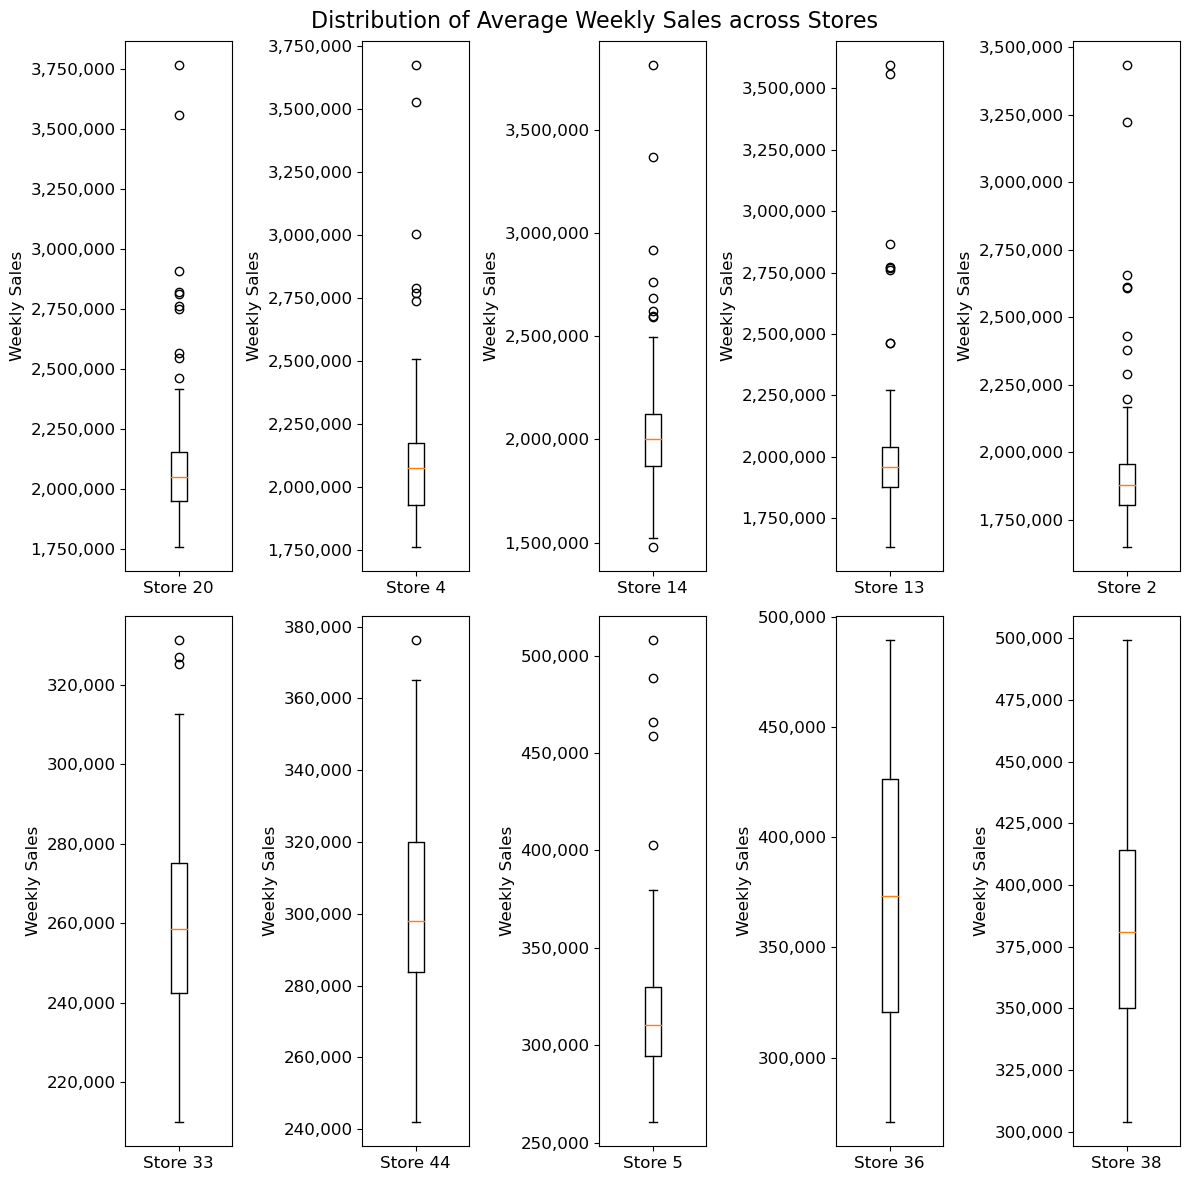

In [465]:
# Subset the data for the top 5 and lowest 5 stores based on average weekly sales
top_5_stores = df.groupby('Store')['Weekly_Sales'].mean().nlargest(5).index
lowest_5_stores = df.groupby('Store')['Weekly_Sales'].mean().nsmallest(5).index

# Create a subplot for the top 5 stores
fig, axes = plt.subplots(2, 5, figsize=(12, 12))

# Plot boxplots for the top 5 stores
for i, store in enumerate(top_5_stores):
    ax = axes[0, i]
    ax.boxplot(df[df['Store'] == store]['Weekly_Sales'])
    ax.set_xticklabels(['Store ' + str(store)], fontsize=12)
    ax.set_ylabel('Weekly Sales',fontsize=12)
    ax.set_yticklabels(['{:.0f}'.format(x) for x in ax.get_yticks()], fontsize=12)
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Plot boxplots for the lowest 5 stores
for i, store in enumerate(lowest_5_stores):
    ax = axes[1, i]
    ax.boxplot(df[df['Store'] == store]['Weekly_Sales'])
    ax.set_xticklabels(['Store ' + str(store)], fontsize=12)
    ax.set_ylabel('Weekly Sales', fontsize=12)
    ax.set_yticklabels(['{:.0f}'.format(x) for x in ax.get_yticks()], fontsize=12)
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
# Add a title to the plot
fig.suptitle('Distribution of Average Weekly Sales across Stores', fontsize=16)


# Adjust the layout and display the plot
plt.tight_layout()


**Weekly Sales** by **Store** Over Time

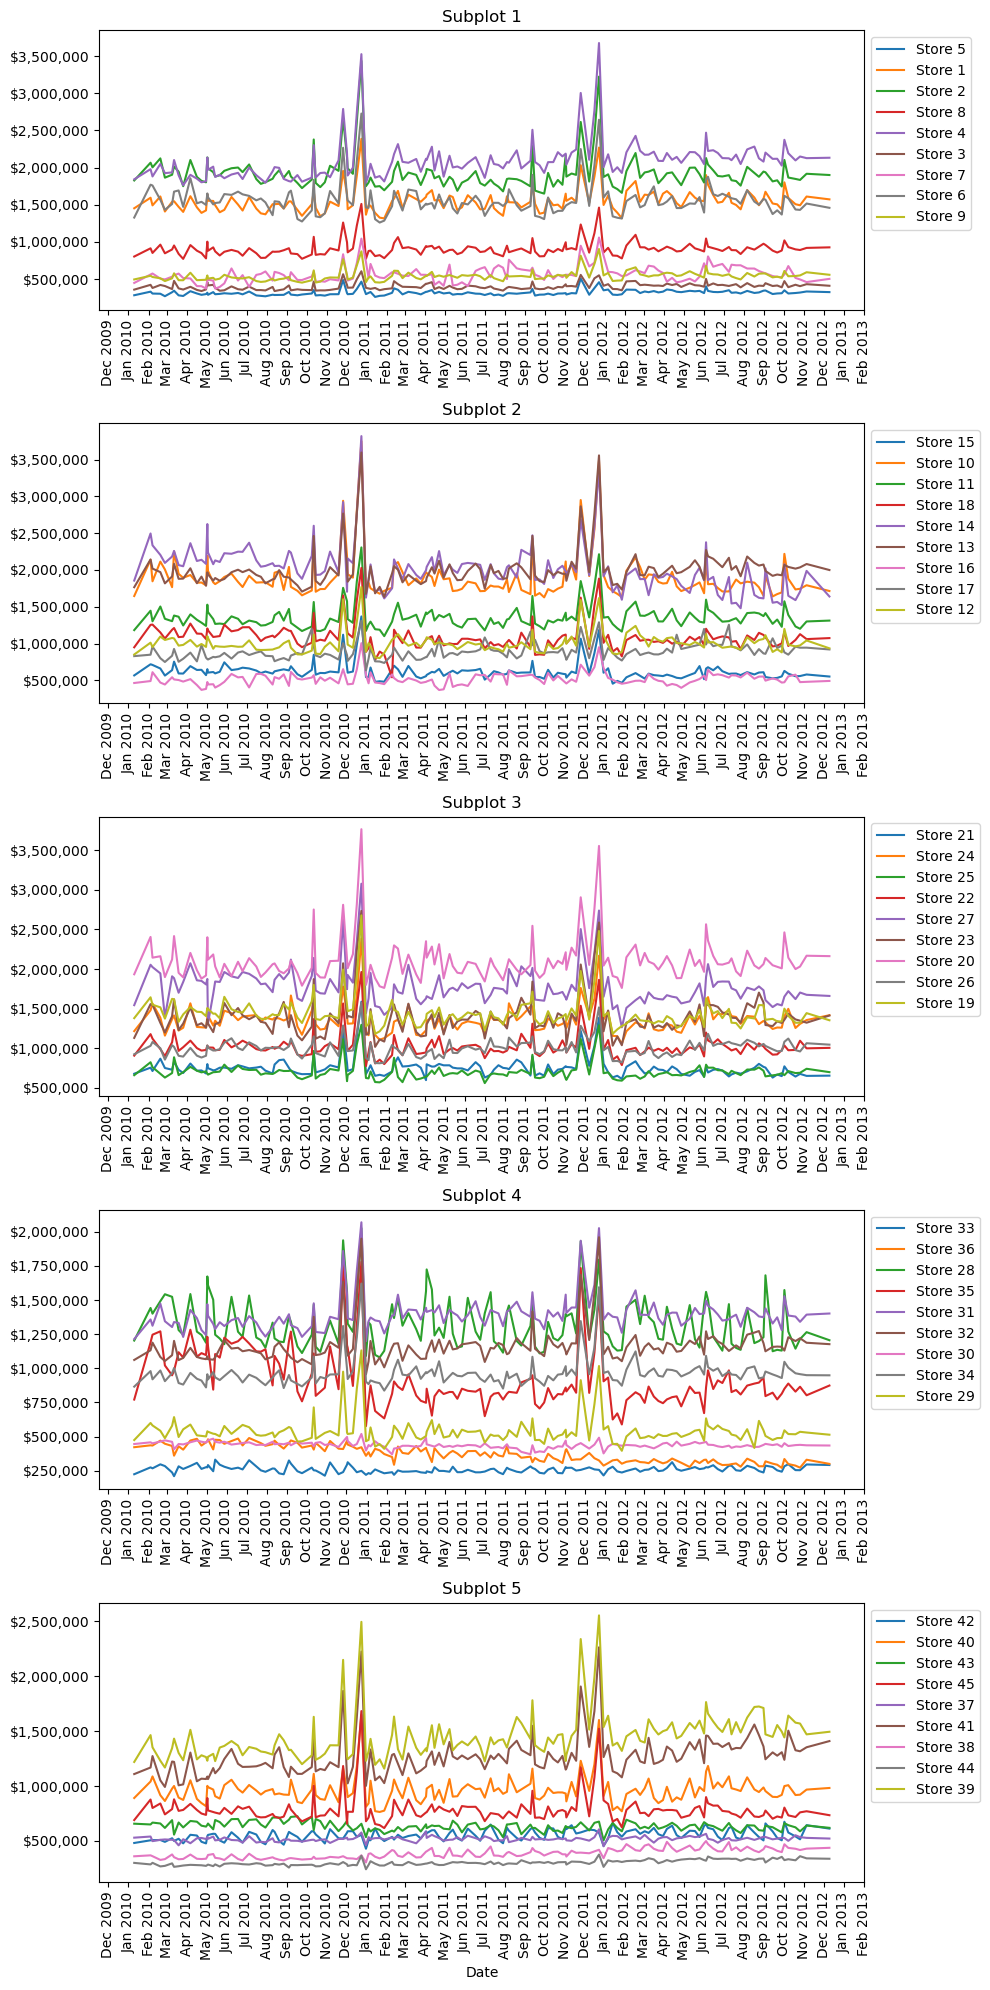

In [466]:

# Sort the dataframe by the 'Date' column in ascending order
df.sort_values('Date', inplace=True)

# Get unique store IDs
stores = df['Store'].unique()

# Calculate the number of stores per subplot
stores_per_subplot = len(stores) // 5

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 20), sharex=False, tight_layout=True)

# Iterate over each subplot
for i, ax in enumerate(axs):
    # Calculate the start and end indices for the current subplot
    start_store = i * stores_per_subplot + 1
    end_store = (i + 1) * stores_per_subplot
    
    # Get the stores for the current subplot
    subplot_stores = [store for store in stores if start_store <= store <= end_store]
    
    # Iterate over each store in the current subplot and plot weekly sales
    for store in subplot_stores:
        # Filter dataframe for the current store
        store_df = df[df['Store'] == store]
        
        # Plot weekly sales
        ax.plot(store_df['Date'], store_df['Weekly_Sales'], label='Store {}'.format(store))
    
    # Set subplot title, legend, and grid
    ax.set_title('Subplot {}'.format(i+1))
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    
    # Format y-axis with numeric values
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
    
    # Set x-axis tick frequency and format
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=90)

# Set common x-axis label and title
plt.xlabel('Date')



# Adjust subplot spacing
plt.subplots_adjust(hspace=0.5)

Most stores seem to follow the same general pattern

## Visualizations Involving **Temperature**

**Average** Weekly Sales by **Temperature Ranges**

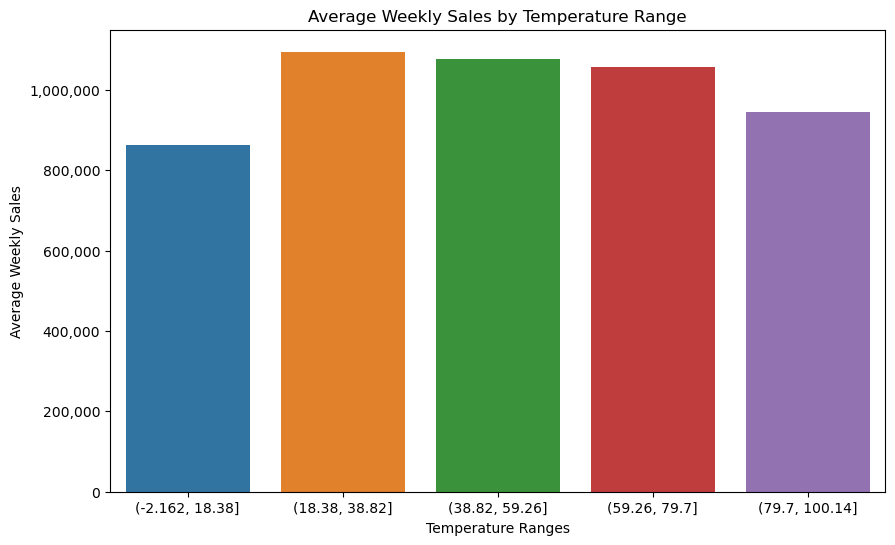

In [467]:
temperature = df['Temperature']
weekly_sales = df['Weekly_Sales']

# Divide the temperature values into bins or ranges
temperature_bins = pd.cut(temperature, bins=5)

# Create a new dataframe with temperature bins and weekly sales
data = pd.DataFrame({'Temperature Range': temperature_bins, 'Weekly Sales': weekly_sales})

# Calculate the average sales for each temperature range
average_sales = data.groupby('Temperature Range')['Weekly Sales'].mean().reset_index()

# Create a bar chart of average sales by temperature group
plt.figure(figsize=(10,6))
sns.barplot(x='Temperature Range', y='Weekly Sales', data=average_sales)

plt.xlabel('Temperature Ranges')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Temperature Range')
plt.ticklabel_format(style='plain', axis='y')  # Format the y-axis labels as plain numeric values
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Add thousands separators to the y-axis labels





**First Impression**: Nothing stands out as peculiar. I feel that it makes sense that the lowest sales numbers is when the temperatures are the most extreme. 

**Weekly Sales** vs **Temperature**

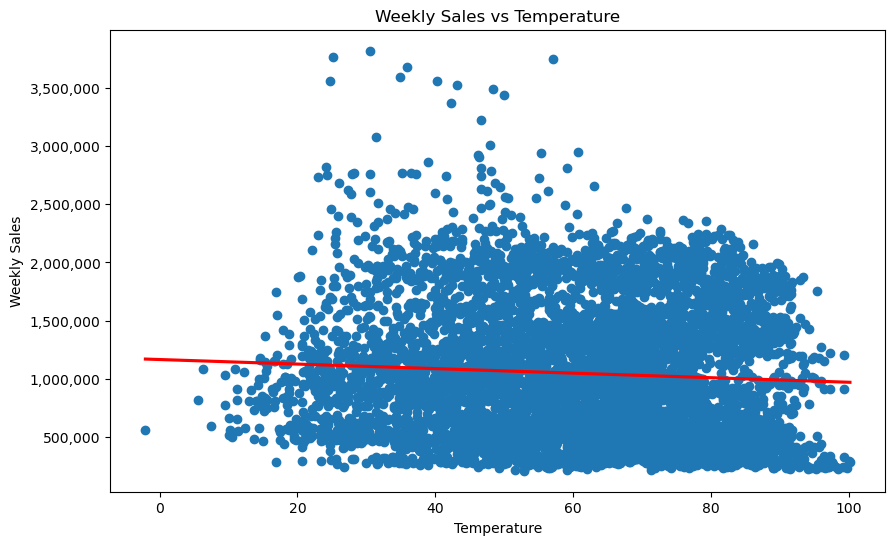

In [468]:
temperature = df['Temperature']
weekly_sales = df['Weekly_Sales']

plt.figure(figsize=(10, 6))
plt.scatter(temperature, weekly_sales)
sns.regplot(x='Temperature', y='Weekly_Sales', data=df, scatter=False, color='red', ci=False)

plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Temperature')
plt.ticklabel_format(style='plain', axis='y') 
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) 


There's a slight negative relationship between **Temperature** and **Weekly Sales**. Most apparent outliers fall between **20** and **60** degrees which could explain how the middle 3 temperature bins have the highest 3 **Average Weekly Sales**. 

**Violin Plot** of **Weekly Sales** by **Temperature**

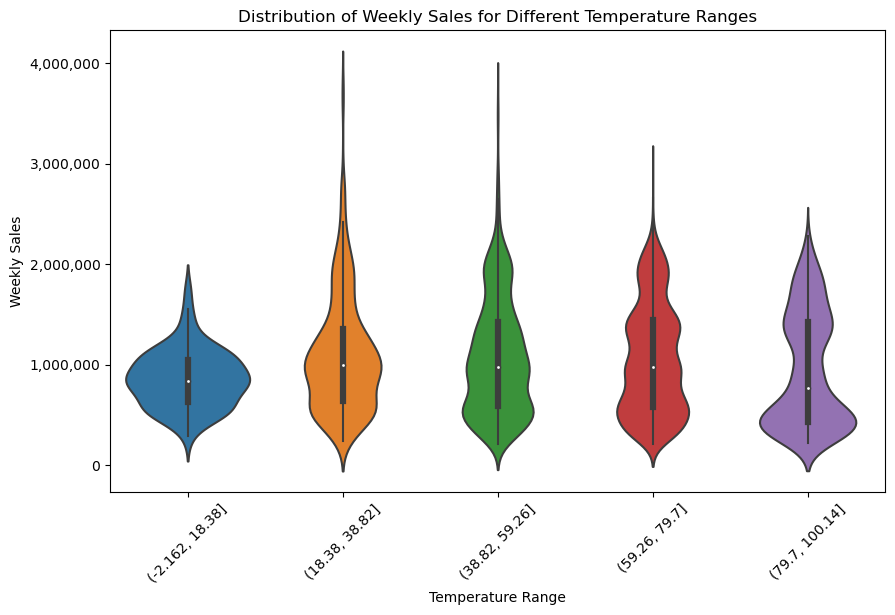

In [469]:
temperature = df['Temperature']
weekly_sales = df['Weekly_Sales']

# Divide the temperature values into bins or ranges
temperature_bins = pd.cut(temperature, bins=5)  # You can adjust the number of bins as per your preference

# Create a new dataframe with temperature bins and weekly sales
data = pd.DataFrame({'Temperature Range': temperature_bins, 'Weekly Sales': weekly_sales})

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Temperature Range', y='Weekly Sales', data=data)
plt.xlabel('Temperature Range')
plt.ylabel('Weekly Sales')
plt.title('Distribution of Weekly Sales for Different Temperature Ranges')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y') 
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) 


The **highest 3** average Weekly Sales bins are the 3 with the **highest violin plot peaks**. Also, the **first** and **last** bin have large concentrations of lower Weekly Sales which contributes to it's **lower average**. It's interesting how close each temperature range has similar average sales; it further enforces the small relationship we found above.

## Visualizations Involving **Fuel Price**

**Average Weekly Sales** by **Fuel Price**

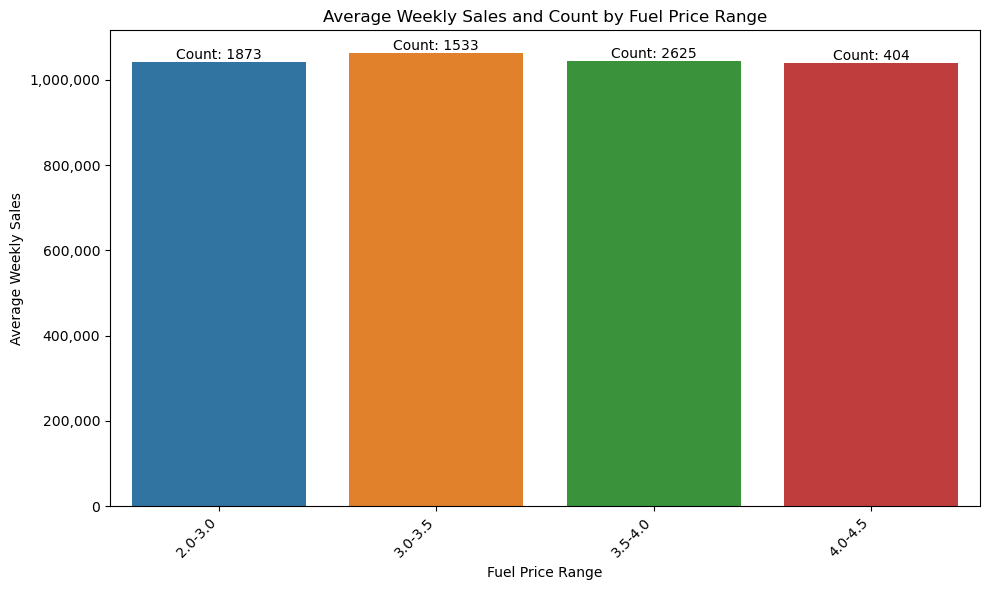

In [470]:
# Define the price ranges for each bin
price_ranges = [(2.0, 3.0), (3.0, 3.5), (3.5, 4.0), (4.0, 4.5)]

# Step 1: Preprocess the data
df['Fuel_Price_Bins'] = pd.cut(df['Fuel_Price'], bins=[range[0] for range in price_ranges] + [price_ranges[-1][1]], 
                               labels=[f'{range[0]}-{range[1]}' for range in price_ranges])  # Bin the 'Fuel_Price' values with custom labels



df_grouped = df.groupby('Fuel_Price_Bins')['Weekly_Sales'].agg(['mean', 'count']).reset_index()

# Step 2: Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar plot
sns.barplot(x='Fuel_Price_Bins', y='mean', data=df_grouped, ax=ax)

# Add the count labels on top of each bar
for index, row in df_grouped.iterrows():
    ax.text(index, row['mean'] + 1000, f'Count: {row["count"]}', ha='center', va='bottom')

ax.set_xlabel('Fuel Price Range')
ax.set_ylabel('Average Weekly Sales')
ax.set_title('Average Weekly Sales and Count by Fuel Price Range')

# Customize the x-axis tick labels
ax.set_xticklabels(df_grouped['Fuel_Price_Bins'], rotation=45, ha='right')

plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the bar plot
plt.tight_layout()


**First Impression**: There's not much to go on as they all have very similar Average Weekly Sales. I'll have to keep in mind that the **4+ Fuel Price** bin has significantly lower counts than the other bins. 

**Box Plot** of **Weekly Sales** by **Fuel Price**

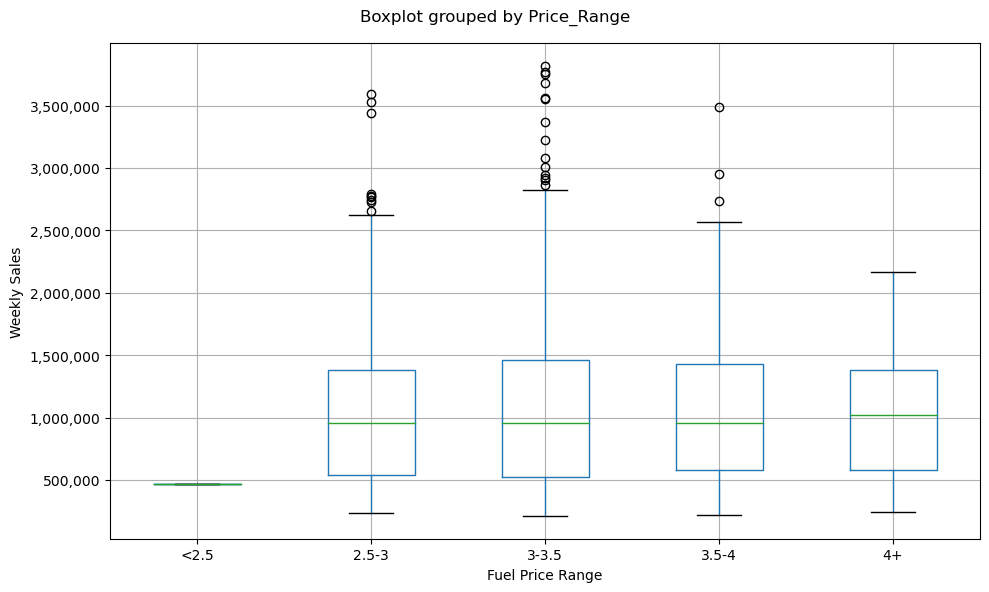

In [471]:
# Step 1: Preprocess the data
df['Price_Range'] = pd.cut(df['Fuel_Price'], bins=[0, 2.5, 3, 3.5, 4, 5], labels=['<2.5', '2.5-3', '3-3.5', '3.5-4', '4+'])

# Step 2: Create the box plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the box plot
df.boxplot(column='Weekly_Sales', by='Price_Range', ax=ax)
ax.set_xlabel('Fuel Price Range')
ax.set_ylabel('Weekly Sales')
ax.set_title('')


plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the box plot
plt.tight_layout()


This plot is interesting. The **largest bin** actually has the **highest median sales** even though the prior plot has them as the lowest. However, the outliers from the other bins drag its average up so that they pass the 4+ bin.

Comparing **Weekly Sales** and **Fuel Price** 

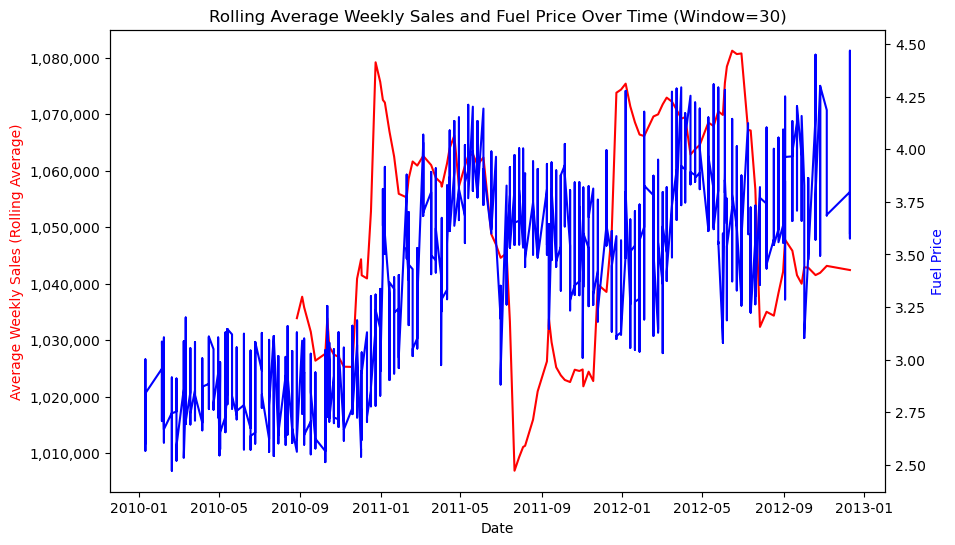

In [472]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Calculate the rolling average of weekly sales for all stores
rolling_average_sales = df.groupby('Date')['Weekly_Sales'].mean().rolling(window=30).mean()

# Align the rolling average with the corresponding dates
rolling_average_sales = rolling_average_sales.reindex(df['Date'])

# Plot rolling average of average weekly sales on the primary y-axis
ax1.plot(df['Date'], rolling_average_sales, color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Weekly Sales (Rolling Average)', color='red')
# Format left y-axis tick labels
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot fuel price on the secondary y-axis
ax2.plot(df['Date'], df['Fuel_Price'], color='blue')
ax2.set_ylabel('Fuel Price', color='blue')


# Set the title
plt.title('Rolling Average Weekly Sales and Fuel Price Over Time (Window=30)');



There doesn't appear to be a strong relationship between the two columns, however, further analysis should be done to conclusively determine that.

**Scatterplot** of **Fuel Price** and **Weekly Sales** 

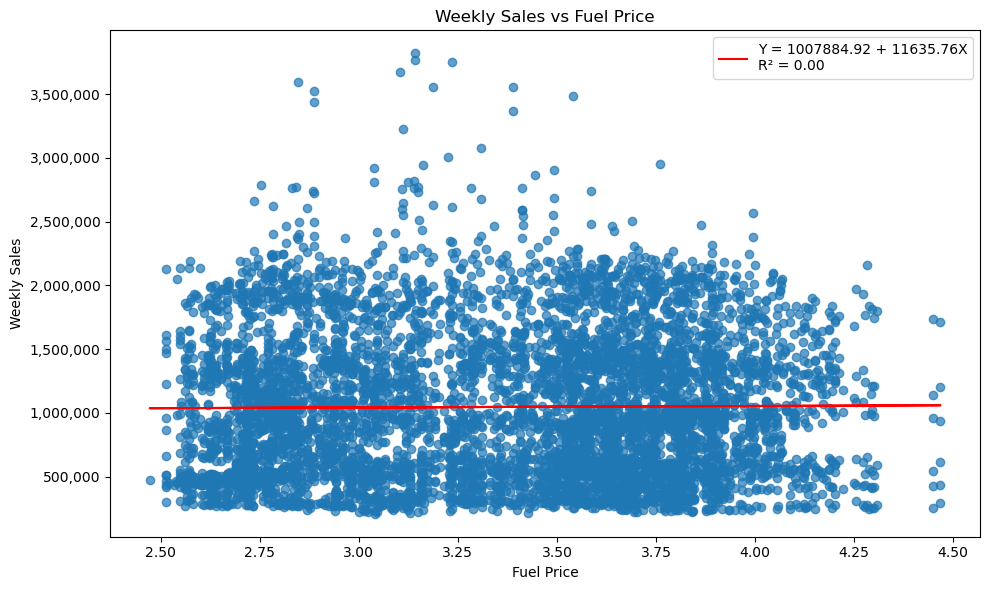

In [473]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create the scatter plot
ax.scatter(df['Fuel_Price'], df['Weekly_Sales'], alpha=0.7)

# Fit the regression line
X = sm.add_constant(df['Fuel_Price'])
model = sm.OLS(df['Weekly_Sales'], X)
results = model.fit()
slope = results.params[1]
intercept = results.params[0]
r_squared = results.rsquared

# Add the regression line
ax.plot(df['Fuel_Price'], intercept + slope * df['Fuel_Price'], color='red', label=f'Y = {intercept:.2f} + {slope:.2f}X\nR² = {r_squared:.2f}')

# Set axis labels
ax.set_xlabel('Fuel Price')
ax.set_ylabel('Weekly Sales')

plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add a title
plt.title('Weekly Sales vs Fuel Price')

# Add legend
ax.legend()

plt.tight_layout()



The plot above **confirmed** my prior **hypothesis**. There is no discernable relationship between **Weekly Sales** and **Fuel Price**

In [474]:
df.drop(['Fuel_Price_Bins', 'Price_Range'], axis=1, inplace=True)

## Visualizations Involving **CPI**

**Average Weekly Sales** by **CPI**

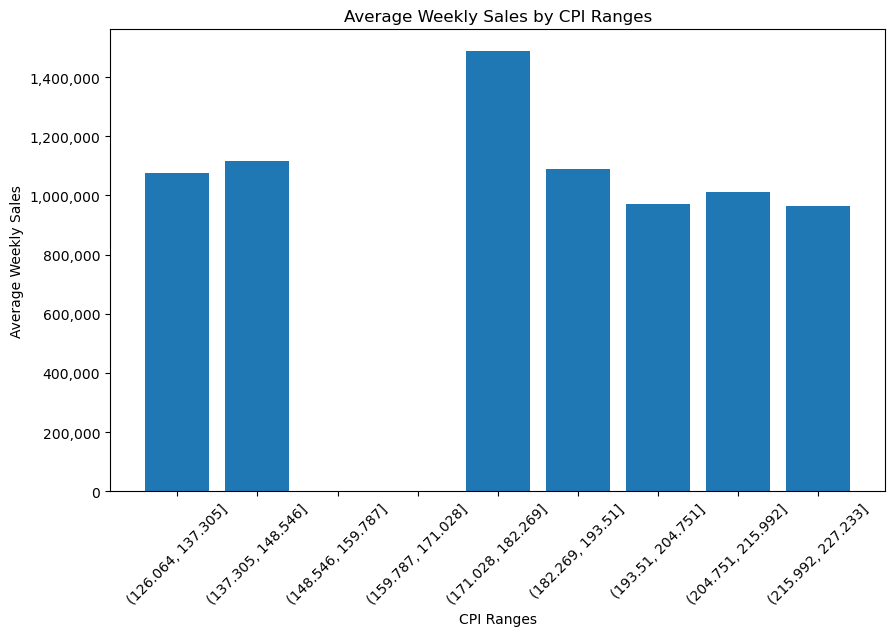

In [475]:
# Create bins for CPI ranges
cpi_bins = np.linspace(df['CPI'].min(), df['CPI'].max(), 10)

# Group the data by CPI ranges and calculate the average weekly sales
cpi_groups = df.groupby(pd.cut(df['CPI'], bins=cpi_bins))
avg_sales_by_cpi = cpi_groups['Weekly_Sales'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_sales_by_cpi.index.astype(str), avg_sales_by_cpi)
plt.xlabel('CPI Ranges')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by CPI Ranges')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45);


**First Impression**: The gap in CPI data will affect my data visualizations negatively. I would have expected the higher CPI numbers to lead to less sales.

Examining the Distribution of **Weekly Sales** by **CPI**

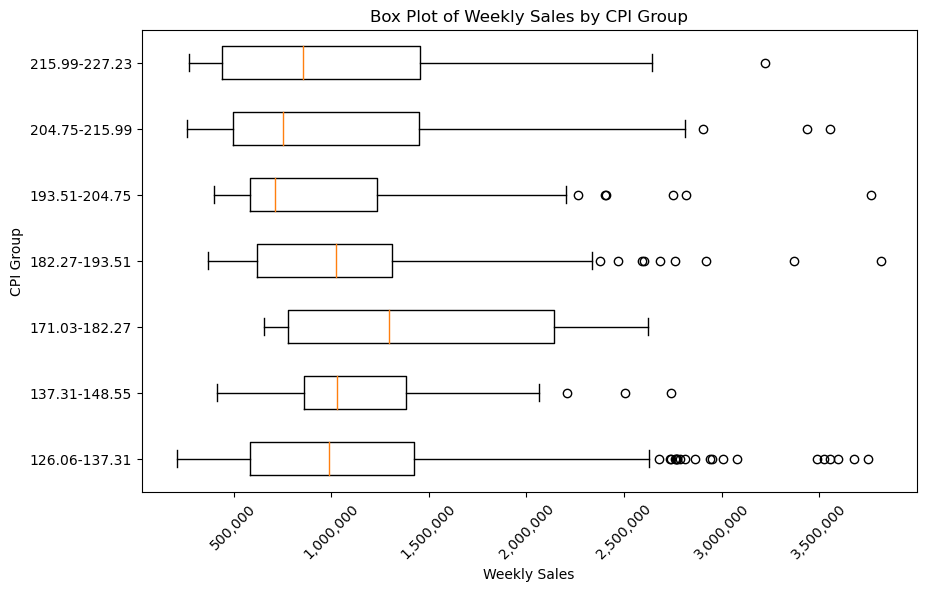

In [476]:
# Create bins for CPI ranges
cpi_bins = np.linspace(df['CPI'].min(), df['CPI'].max(), 10)

# Assign CPI values to corresponding bins
df['CPI Category'] = pd.cut(df['CPI'], bins=cpi_bins)

# Group the data by CPI Category and count the number of occurrences in each category
bin_counts = df['CPI Category'].value_counts()

# Filter out the bins with no data
valid_bins = bin_counts[bin_counts > 0].index
df = df[df['CPI Category'].isin(valid_bins)]

# Sort the valid bins in ascending order
valid_bins = sorted(valid_bins, key=lambda x: x.left)

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df.loc[df['CPI Category'] == category, 'Weekly_Sales'] for category in valid_bins], vert=False)

# Set the x-axis and y-axis labels
plt.xlabel('Weekly Sales')
plt.ylabel('CPI Group')

# Set the title
plt.title('Box Plot of Weekly Sales by CPI Group')

# Set the x-axis tick labels
plt.xticks(rotation=45)

plt.ticklabel_format(style='plain', axis='x')
plt.gca().get_xaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Label the CPI bins on the y-axis in sorted order
ytick_labels = [f'{bin.left:.2f}-{bin.right:.2f}' for bin in valid_bins]
plt.yticks(range(1, len(valid_bins) + 1), ytick_labels);


It's interesting how the CPI Group with the highest Average Weekly Sales from the last plot be the only boxplot without any outliers. I'm also intrigued by how large the range of values is in the smallest bin. 

Examining the Relationship between **Weekly Sales** and **CPI**

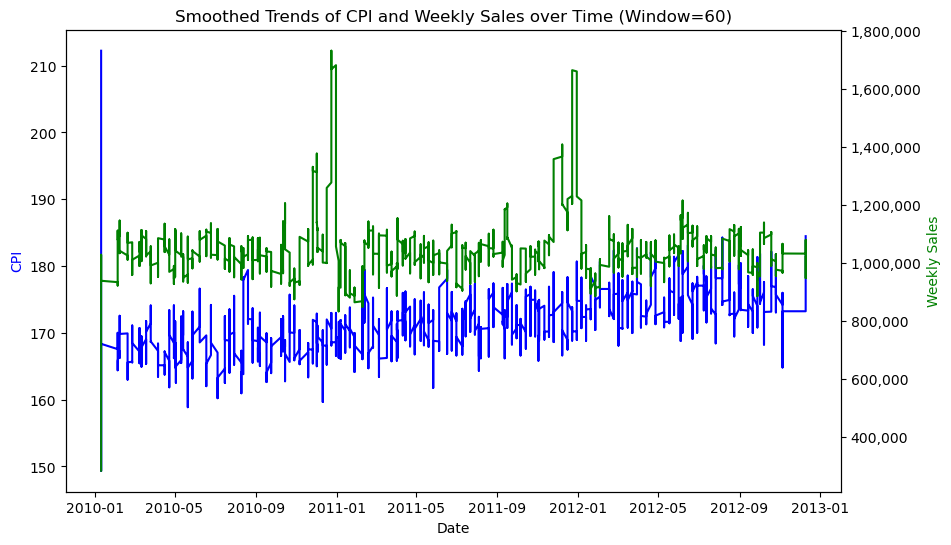

In [477]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Smooth CPI values using rolling average
smoothed_cpi = df['CPI'].rolling(window=60, min_periods=1).mean()

# Dual-axis line plot for smoothed CPI values
ax1.plot(df['Date'], smoothed_cpi, label='Smoothed CPI', color='blue')#, marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI', color='blue')

# Create a twin y-axis for Weekly Sales
ax2 = ax1.twinx()

# Smooth Weekly Sales values using rolling average
smoothed_sales = df['Weekly_Sales'].rolling(window=60, min_periods=1).mean()

# Dual-axis line plot for smoothed Weekly Sales values
ax2.plot(df['Date'], smoothed_sales, label='Smoothed Weekly Sales', color='green')#, marker='s')
ax2.set_ylabel('Weekly Sales', color='green')

plt.title('Smoothed Trends of CPI and Weekly Sales over Time (Window=60)')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

There may be some type of inverse relationship between Sales and CPI, however, it's difficult to tell definitively.

Scatterplot of **Weekly Sales** vs **CPI** with a **Regression Line**

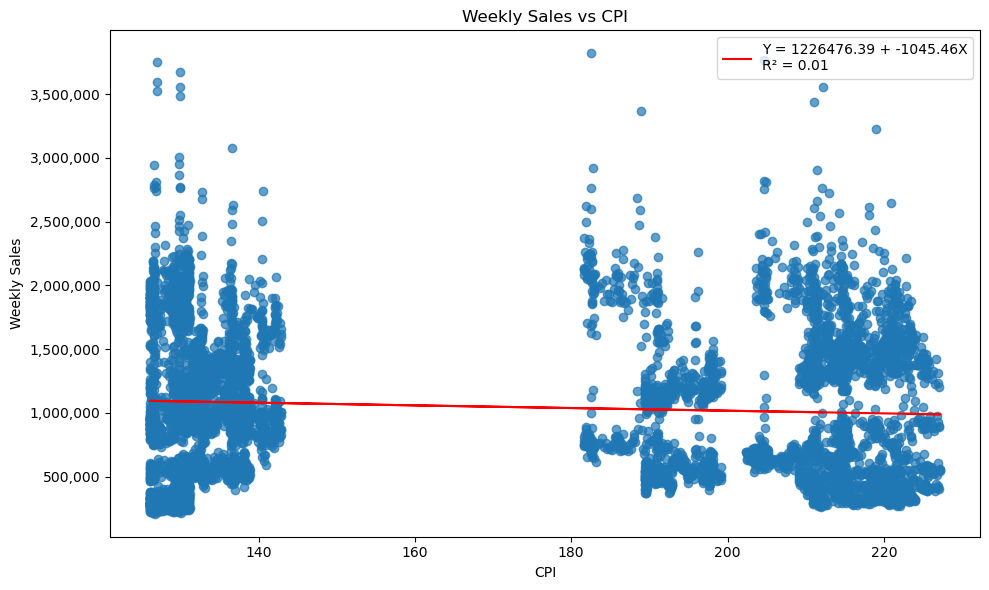

In [478]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create the scatter plot
ax.scatter(df['CPI'], df['Weekly_Sales'], alpha=0.7)

# Fit the regression line
X = sm.add_constant(df['CPI'])
model = sm.OLS(df['Weekly_Sales'], X)
results = model.fit()
slope = results.params[1]
intercept = results.params[0]
r_squared = results.rsquared

# Add the regression line
ax.plot(df['CPI'], intercept + slope * df['CPI'], color='red', label=f'Y = {intercept:.2f} + {slope:.2f}X\nR² = {r_squared:.2f}')

# Set axis labels
ax.set_xlabel('CPI')
ax.set_ylabel('Weekly Sales')

plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add a title
plt.title('Weekly Sales vs CPI')

# Add legend
ax.legend()

plt.tight_layout()



There's a very slight inverse relationship between CPI and Weekly Sales.

In [479]:
df.drop(columns=('CPI Category'), inplace=True)

## Visualizations Involving **Unemployment**

**Kernel Density Plot** for **Weekly Sales** and **Unemployment**

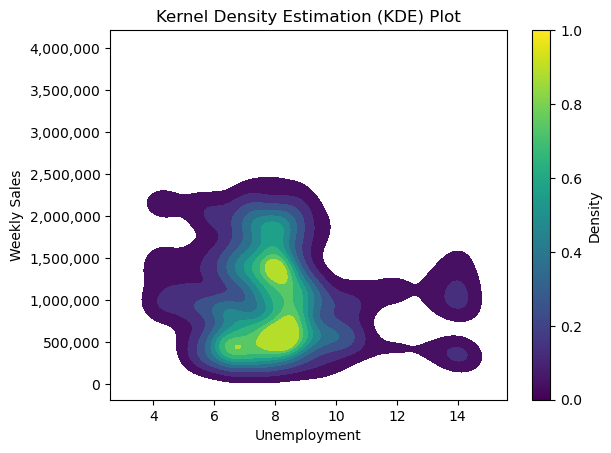

In [480]:
# Plot the KDE plot with a customized colormap
kde = sns.kdeplot(data=df, x='Unemployment', y='Weekly_Sales', shade=True, cmap='viridis')

# Set the axis labels and title
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Kernel Density Estimation (KDE) Plot')

plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Create a separate scalar mappable for the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')

# Add a colorbar legend
cbar = plt.colorbar(sm)
cbar.set_label('Density')



**First Impression**: The majority of the data falls between an **Unemployment Rate** of **6-9%**. Most observations also fall in between ~**$500,000-1,500,000**. I'll continue to dive into the relationship between **Unemployment** and **Weekly Sales**.

**Average Weekly Sales** by **Unemployment**

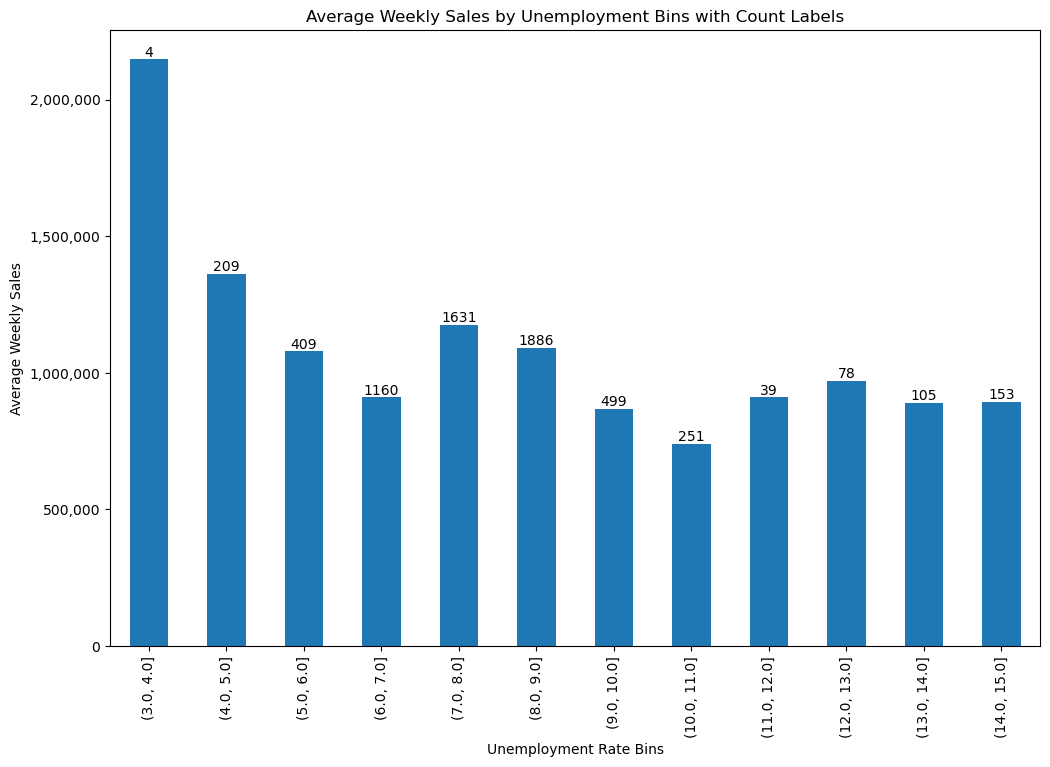

In [481]:
# Define the bin edges for 'Unemployment' column
bin_edges = np.arange(0, df['Unemployment'].max() + 1, 1)

# Bin the 'Unemployment' column and calculate average or total 'Weekly Sales'
df['Unemployment_bins'] = pd.cut(df['Unemployment'], bins=bin_edges)
grouped_data = df.groupby('Unemployment_bins')['Weekly_Sales'].mean()

# Filter out unemployment bins with no data
grouped_data = grouped_data[grouped_data.notnull()]

# Create the bar plot
plt.figure(figsize=(12,8))
ax = grouped_data.plot(kind='bar')

plt.xlabel('Unemployment Rate Bins')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Unemployment Bins with Count Labels')

# Add data labels
for i, v in enumerate(grouped_data):
    label = str(df[df['Unemployment_bins'] == grouped_data.index[i]]['Unemployment_bins'].value_counts().iloc[0])
    ax.text(i, v, label, ha='center', va='bottom')

plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))




Even though the **Unemployment Rate** of **3-4%** only has 4 observations, I feel confident in saying that the lower half of the rates has a **higher** Average Weekly Sales. The Count labels verify the KDE plot from above as each bar from **6-9%** has over **1000 observations**.  

**Boxplot** of **Weekly Sales** by **Unemployment Rates** 

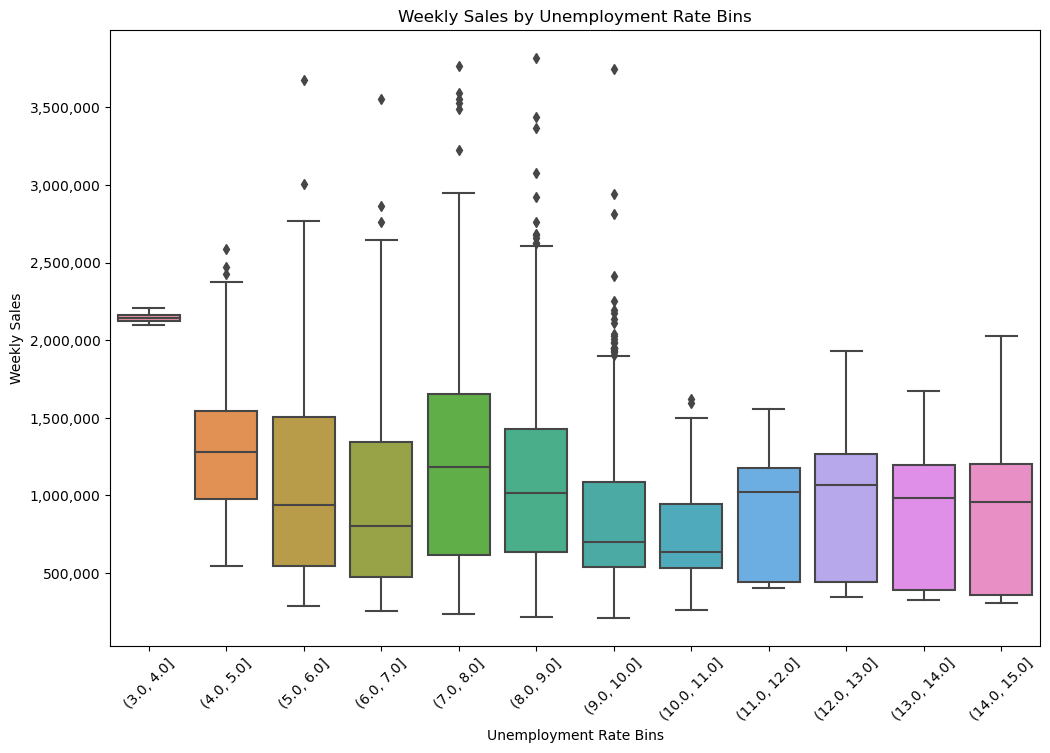

In [482]:
# Define the same bins from the plot above
bin_edges = np.arange(3, df['Unemployment'].max() + 1, 1)

# Bin the 'Unemployment' column and calculate average 'Weekly Sales'
df['Unemployment_bins'] = pd.cut(df['Unemployment'], bins=bin_edges)
grouped_data = df.groupby('Unemployment_bins')['Weekly_Sales']

# Create the boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x='Unemployment_bins', y='Weekly_Sales', data=df)


plt.xlabel('Unemployment Rate Bins')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Unemployment Rate Bins')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

One interesting aspect of this visual is that many of the **higher Unemployment Rates** actually have **higher median Sales** compared to the lower half rates. We saw in the previous plots that the lower rates have higher sales. While they have lower medians, the **lower rates** also have much **larger ranges and outliers**. 

Examining the **Relationship** between **Weekly Sales** and **Unemployment**

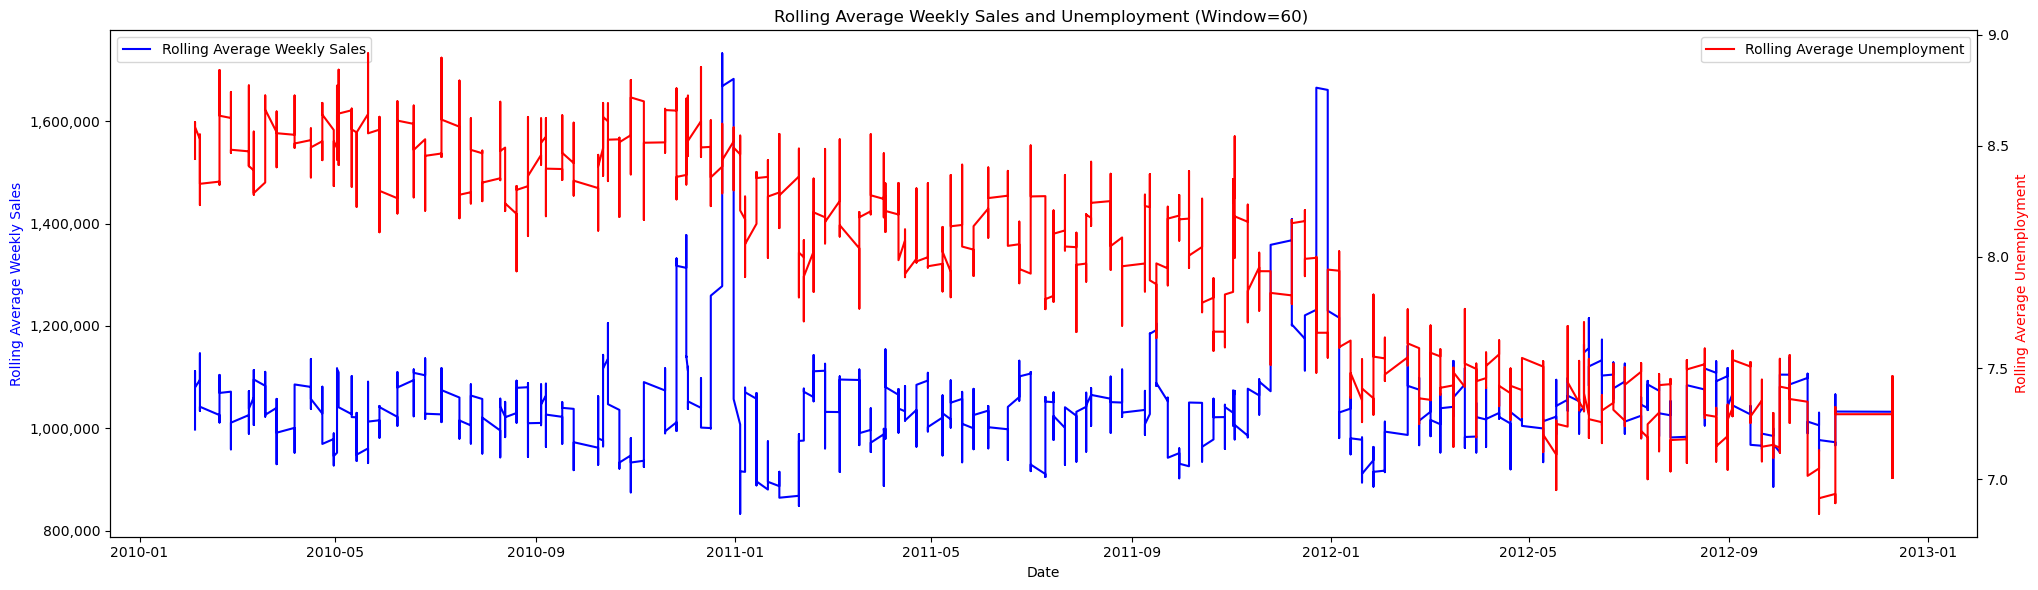

In [483]:
# Calculate the rolling average for Weekly Sales
rolling_average_sales = df['Weekly_Sales'].rolling(window=60).mean()

# Calculate the rolling average for Unemployment
rolling_average_unemployment = df['Unemployment'].rolling(window=60).mean()

# Set the size of the plot
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot the Weekly Sales data and rolling average
ax1.plot(df['Date'], rolling_average_sales, color='blue', label='Rolling Average Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Rolling Average Weekly Sales', color='blue')

# Create a second y-axis for Unemployment
ax2 = ax1.twinx()

# Plot the Unemployment data and rolling average
ax2.plot(df['Date'], rolling_average_unemployment, color='red', label='Rolling Average Unemployment')
ax2.set_ylabel('Rolling Average Unemployment', color='red')

# Set the title and legends
plt.title('Rolling Average Weekly Sales and Unemployment (Window=60) ')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate the x-axis tick labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()

# Format y-axis tick labels for both axes
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))

There's not an obvious relationship between **Weekly Sales** and **Unemployment**. While **Unemployment decreases** noticeably over time, there is **no clear upward trend in sales**. Below, I'll put the data on a scatterplot and show the regression line

**Scatterplot** of **Weekly Sales** and **Unemployment**

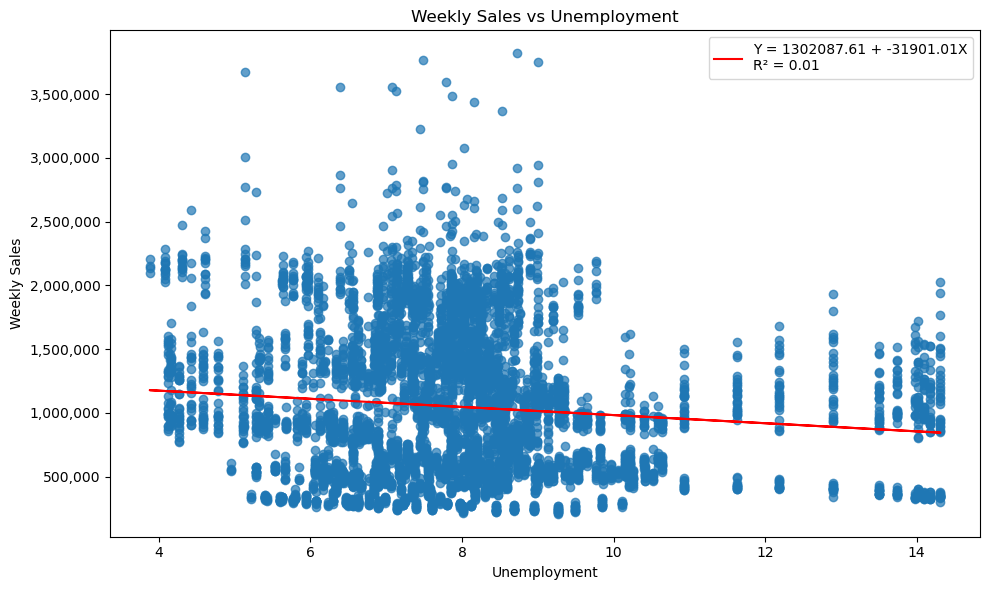

In [484]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(10, 6))

# Create the scatter plot
ax.scatter(df['Unemployment'], df['Weekly_Sales'], alpha=0.7)

# Fit the regression line
X = sm.add_constant(df['Unemployment'])
model = sm.OLS(df['Weekly_Sales'], X)
results = model.fit()
slope = results.params[1]
intercept = results.params[0]
r_squared = results.rsquared

# Add the regression line
ax.plot(df['Unemployment'], intercept + slope * df['Unemployment'], color='red', label=f'Y = {intercept:.2f} + {slope:.2f}X\nR² = {r_squared:.2f}')

# Set axis labels
ax.set_xlabel('Unemployment')
ax.set_ylabel('Weekly Sales')

plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add a title
plt.title('Weekly Sales vs Unemployment')

# Add legend
ax.legend()

plt.tight_layout()

The scatterplot above shows a slight inverse relationship. This finding **confirms** my earlier findings that the **lower Unemployment Rates** have **higher Average Weekly Sales**. 

In [485]:
df.drop(columns=('Unemployment_bins'), inplace=True)

## Visualizations Involving **Year**

**Barplot** and **KDE Plot** of **Weekly Sales** by **Year**

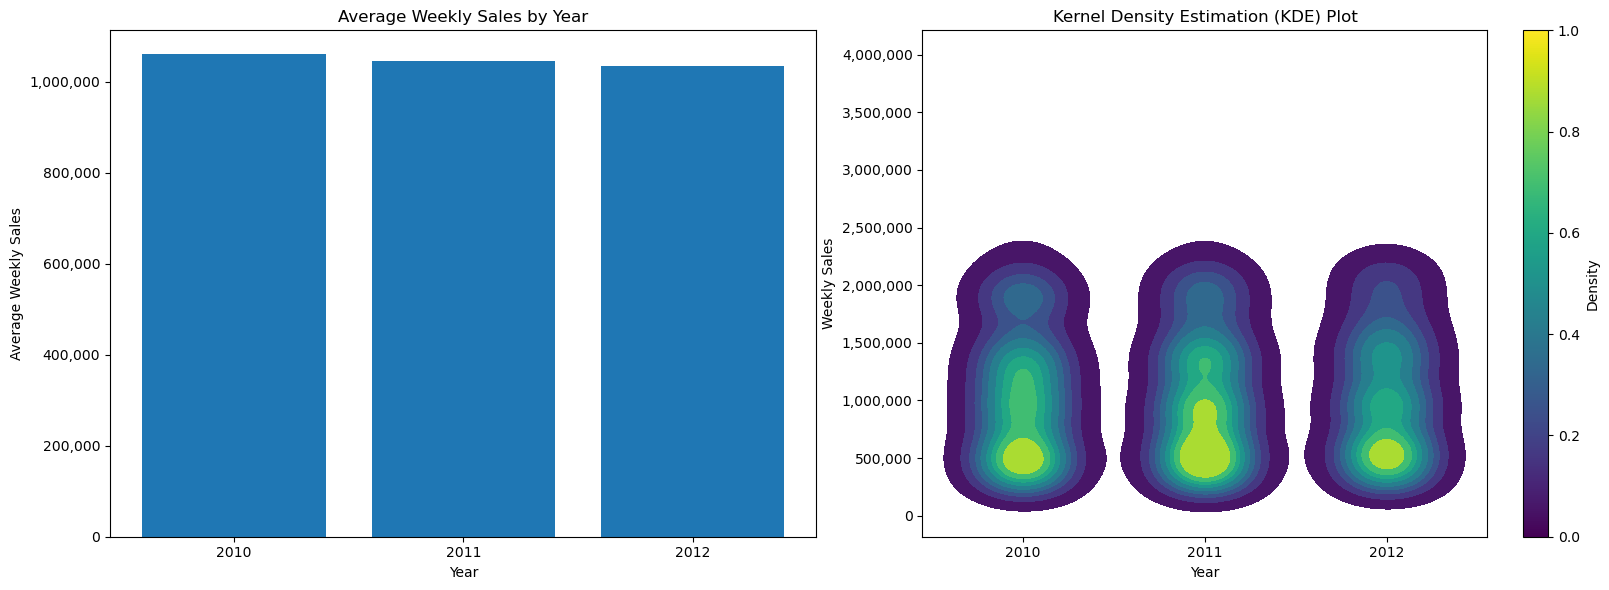

In [486]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Group the data by Year and calculate the average weekly sales
grouped_data = df.groupby('Year')['Weekly_Sales'].mean()

# Bar plot on the first subplot
axes[0].bar(grouped_data.index, grouped_data)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Weekly Sales')
axes[0].set_title('Average Weekly Sales by Year')

# KDE plot on the second subplot
sns.kdeplot(data=df, x='Year', y='Weekly_Sales', ax=axes[1], shade=True,  cmap='viridis')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Weekly Sales')
axes[1].set_title('Kernel Density Estimation (KDE) Plot')

# Create a separate scalar mappable for the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')

# Add a colorbar legend
cbar = plt.colorbar(sm)
cbar.set_label('Density')


# Adjust the spacing between subplots
plt.tight_layout()

# Format y-axis tick labels for both axes
axes[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(base=1))
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(base=1))


# Adjust subplot spacing
plt.subplots_adjust(wspace=0.15)

**First Impression**: The plots are **contradicting** eachother. In the bar plot, **2010** has a slightly **higher Average Weekly Sales** than **2011**, however, in the KDE plot, there appears to be a **higher density** of Sales at higher levels in **2011**. I'll continue my analysis on the Weekly Sales Distribution below.

**Boxplot** of **Weekly Sales** by **Year**

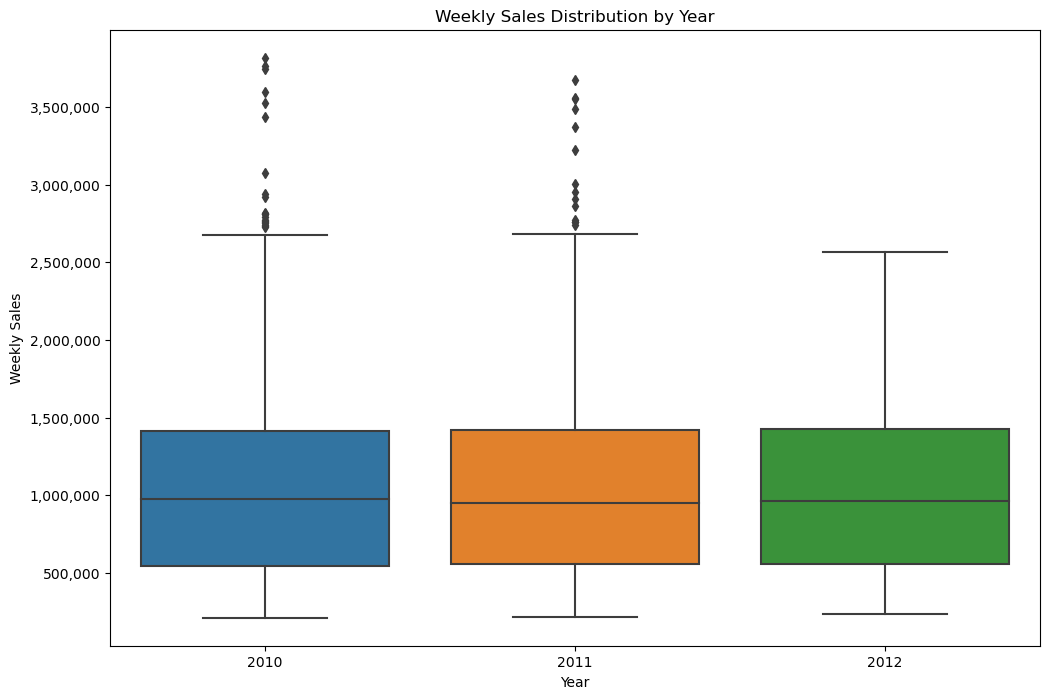

In [487]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='Year', y='Weekly_Sales')
plt.title('Weekly Sales Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')


plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


This plot is **not clarifying** the ambiguity from the previous plot. **2010** has a **higher median, more outliers, and higher outliers**. I will examine another distribution plot below to see a more detailed breakdown.

**Violin Plot** of **Weekly Sales** by **Year**

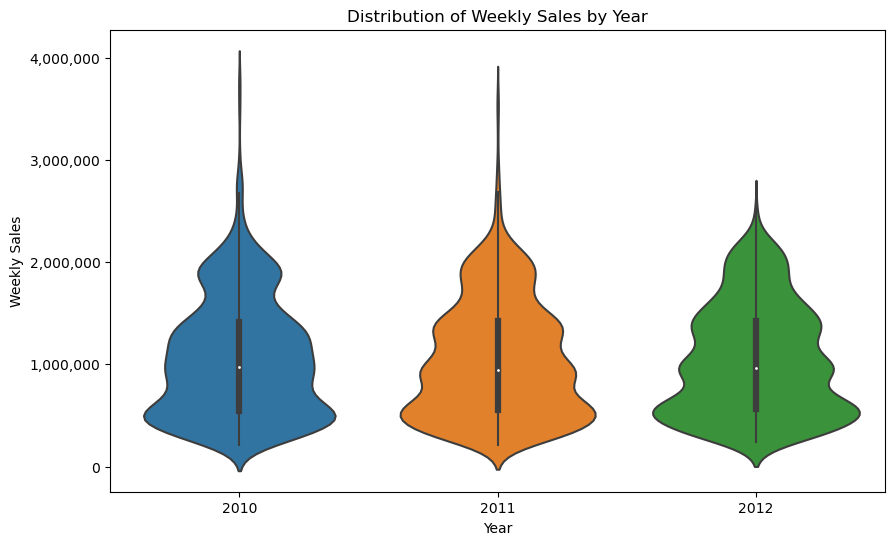

In [488]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Year', y='Weekly_Sales')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.title('Distribution of Weekly Sales by Year')

plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

This plot is more insightful on why 2011 had apparent higher average sales than 2010 in the KDE plot. 2011 has more data between 500k and 1.5 million than 2010; 2011 has more values at 2 million and higher. Below, I have code that allows you to check which violin plot is bigger (wider) at certain Weekly Sales values. The first code allows you to check the size at a given value, and the second piece of code verifies that 2011 has a higher density from $500,000-$1,500,000.

In [489]:
# Subset the data for each group
df_2010 = df[df['Year'] == 2010]
df_2011 = df[df['Year'] == 2011]

# Calculate KDE for each group
kde_2010 = stats.gaussian_kde(df_2010['Weekly_Sales'])
kde_2011 = stats.gaussian_kde(df_2011['Weekly_Sales'])

# Evaluate density at the desired x-axis value
x_value = 2000000
density_2010 = kde_2010.evaluate(x_value)
density_2011 = kde_2011.evaluate(x_value)

# Compare densities
if density_2010 > density_2011:
    print("The average sales at {} is bigger in 2010.".format(x_value))
elif density_2010 < density_2011:
    print("The average sales at {} is bigger in 2011.".format(x_value))
else:
    print("The average sales at {} is the same in 2010 and 2011.".format(x_value))


The average sales at 2000000 is bigger in 2010.


In [490]:

# Subset the data for each group
df_2010 = df[df['Year'] == 2010]
df_2011 = df[df['Year'] == 2011]

# Calculate KDE for each group
kde_2010 = stats.gaussian_kde(df_2010['Weekly_Sales'])
kde_2011 = stats.gaussian_kde(df_2011['Weekly_Sales'])

# Define the range of interest
lower_bound = 500000
upper_bound = 1500000

# Calculate integrated density within the range for each group
density_2010 = kde_2010.integrate_box_1d(lower_bound, upper_bound)
density_2011 = kde_2011.integrate_box_1d(lower_bound, upper_bound)

# Compare integrated densities
if density_2010 > density_2011:
    print("The average sales between {} and {} are bigger in 2010.".format(lower_bound, upper_bound))
elif density_2010 < density_2011:
    print("The average sales between {} and {} are bigger in 2011.".format(lower_bound, upper_bound))
else:
    print("The average sales between {} and {} are the same in 2010 and 2011.".format(lower_bound, upper_bound))


The average sales between 500000 and 1500000 are bigger in 2011.


## Visualizations Involving **Month** 

**Bar Plot** and **KDE Plot** of **Weekly Sales** by **Month**

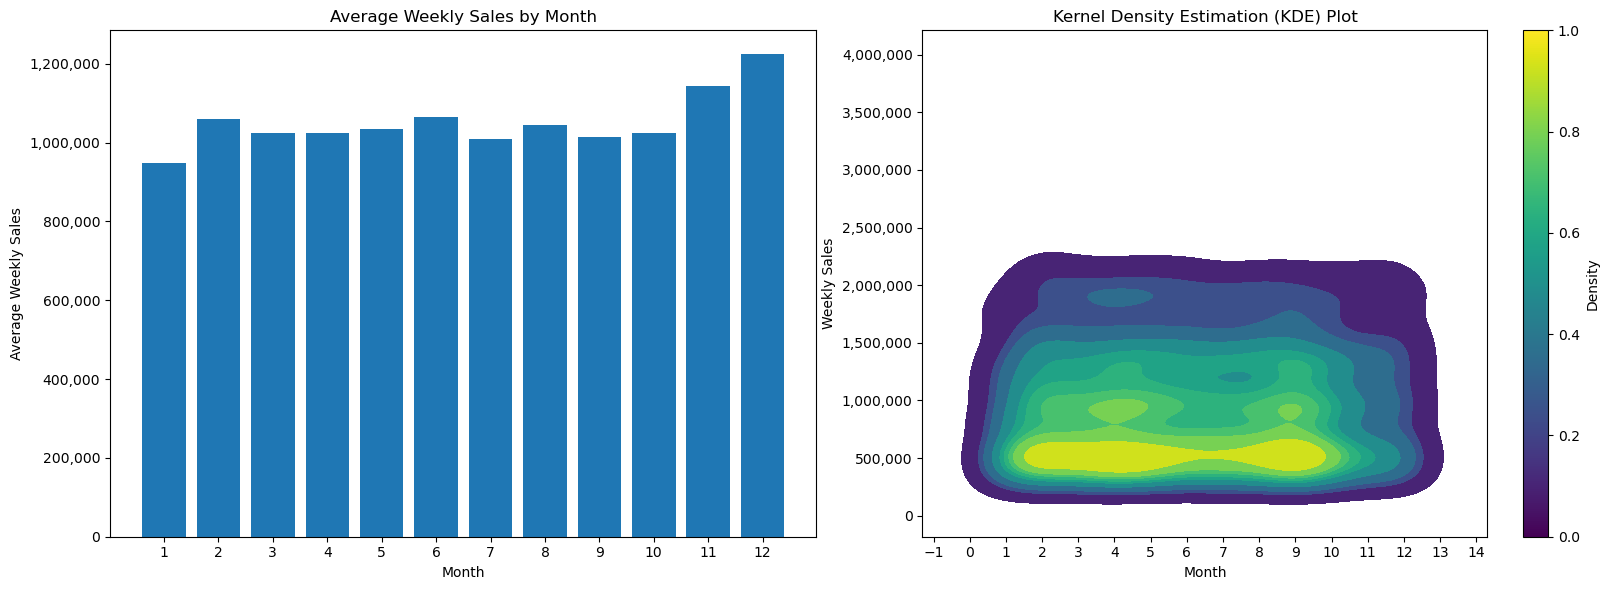

In [491]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Group the data by Year and calculate the average weekly sales
grouped_data = df.groupby('Month')['Weekly_Sales'].mean()

# Bar plot on the first subplot
axes[0].bar(grouped_data.index, grouped_data)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Weekly Sales')
axes[0].set_title('Average Weekly Sales by Month')

# KDE plot on the second subplot
sns.kdeplot(data=df, x='Month', y='Weekly_Sales', ax=axes[1], shade=True,  cmap='viridis')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Weekly Sales')
axes[1].set_title('Kernel Density Estimation (KDE) Plot')

# Create a separate scalar mappable for the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')

# Add a colorbar legend
cbar = plt.colorbar(sm)
cbar.set_label('Density')


# Adjust the spacing between subplots
plt.tight_layout()

# Format y-axis tick labels for both axes
axes[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(base=1))
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(base=1))


# Adjust subplot spacing
plt.subplots_adjust(wspace=0.15)

**First Impression**: These plots are more conflicting than the **Year** bar plot and KDE plot. In the **bar plot**, **November** and **December** have the **highest** Average Sales, but in the KDE plot, it looks like **months 3-5** should have the **highest average**. While it's not neccessarily alarming that November and December don't have high density values in general, I expected to see brighter colors at higher Sales levels. I'll continue to dive into the distribution of Sales by Month below.

**Boxplot** of **Weekly Sales** by **Month**

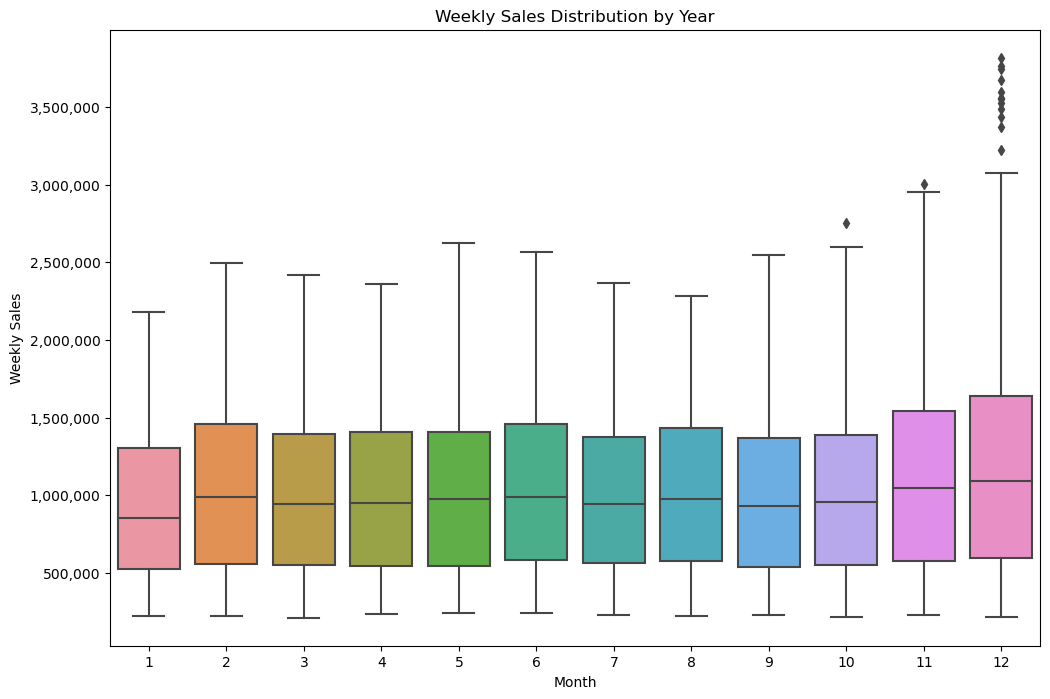

In [492]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='Month', y='Weekly_Sales')
plt.title('Weekly Sales Distribution by Year')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')


plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


The **Boxplot** further enforces the findings from the bar plot above. **November** and **December** have the **highest 3rd Quartile values** as well as the highest maximum values. December also has the most *and* highest outliers which certainly drag its Average Weekly Sales value up. 

**Violin Plot** of **Weekly Sales** by **Month**

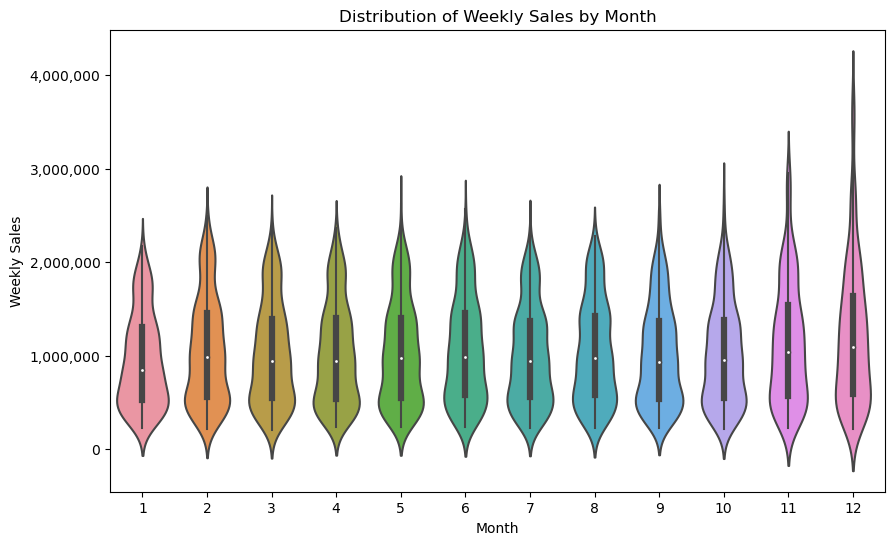

In [493]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Month', y='Weekly_Sales')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Distribution of Weekly Sales by Month')

plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

**November** and **December** are clearly the **top 2** average sales which reinforces what we have seen in previous plots. They are also both the **slimmest violins** in the entire plot which may account for why they have **lower densities** in the **KDE plot**. At the heart of the dataset is the question of how the holidays impact Sales for each store. I believe that we are seeing the affect of Thanksgiving and Christmas on Sales.

## Visualizations Involving **Season**

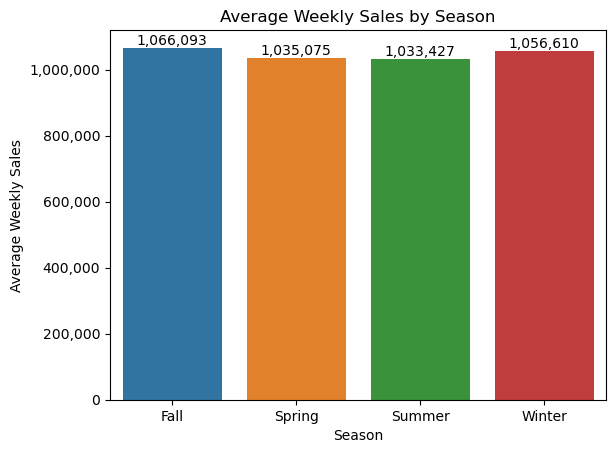

In [494]:
grouped_data = df.groupby('Season')['Weekly_Sales'].mean()

sns.barplot(x=grouped_data.index, y=grouped_data)
plt.title('Average Weekly Sales by Season')
plt.ylabel('Average Weekly Sales')
plt.xlabel('Season')

plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


# Add data labels to the bar plot
for index, value in enumerate(grouped_data):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

Each season has **close Average Weekly Sales**. As we saw before, **November** and **December** have the largest sales which will impact **Fall** and **Winter's** sales numbers. 

**Box Plot** of **Weekly Sales** by **Season**

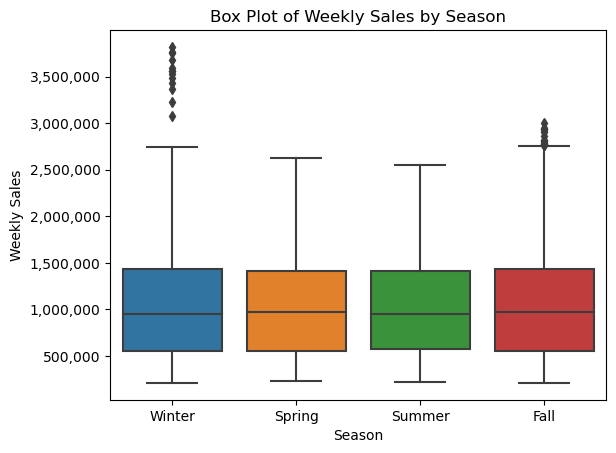

In [495]:
sns.boxplot(x='Season', y='Weekly_Sales', data=df)
plt.title('Box Plot of Weekly Sales by Season')
plt.ylabel('Weekly Sales')

plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


Nothing in particular really stands out here. It makes sense how **Winter** and **Fall** are the only Season's with outliers since they have the **highest Average Sales**. Also, it **mimmicks** the boxplot of **December** since that's the month with the vast majority of outliers. 

**Violin Plot** of **Weekly Sales** by **Season**

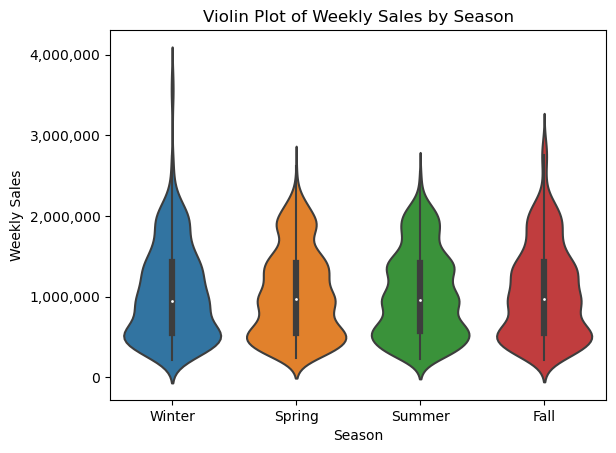

In [496]:
sns.violinplot(x='Season', y='Weekly_Sales', data=df)
plt.title('Violin Plot of Weekly Sales by Season')
plt.ylabel('Weekly Sales')


plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


**Winter** and **Fall** have the highest peaks which enforces our findings from the boxplot before. One aspect that I find interesting is how **Winter** has the most **extreme** values. While it has the **highest maximum**, it also has most of its data at the very **bottom** of the violin. The other seasons have a more **even distribution** of its data. I predict that this is due to **Christmas** dragging up sales in certain weeks while the other weeks have very low sales. The next two visualization sections will analyze the **Holiday** aspect of the dataset. 

In [497]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Season,Holiday_Name
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,1,10,Winter,No Holiday
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,1,10,Winter,No Holiday
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,2010,1,10,Winter,No Holiday
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,2010,1,10,Winter,No Holiday
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,2010,1,10,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195,2012,12,10,Fall,No Holiday
2285,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847,2012,12,10,Fall,No Holiday
1427,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943,2012,12,10,Fall,No Holiday
3572,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293,2012,12,10,Fall,No Holiday


In [498]:
# df.drop(columns=('Cumulative_Weekly_Sales'), inplace=True)

## Visualizations Involving **Holiday Flag**

**Average Weekly Sales** by **Holidays** and **Non-Holidays**

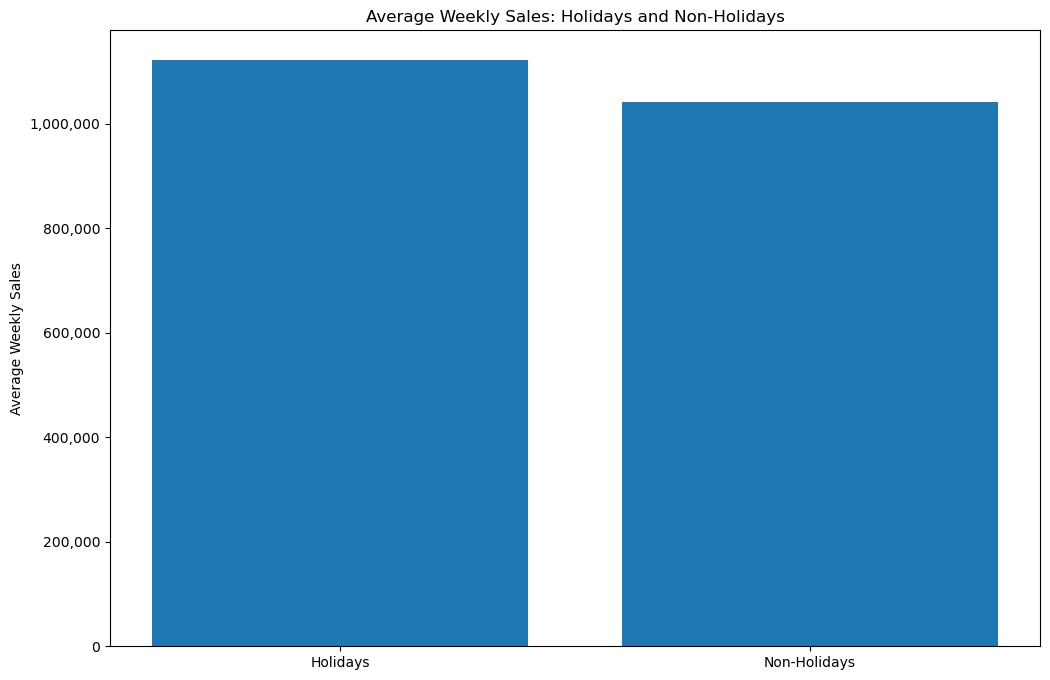

In [499]:
# Calculate the average weekly sales for holidays and non-holidays
holiday_sales = df[df['Holiday_Flag'] ==1]['Weekly_Sales'].mean()
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

# Create a bar plot
plt.figure(figsize=(12,8))
plt.bar(['Holidays', 'Non-Holidays'], [holiday_sales, non_holiday_sales])

plt.title('Average Weekly Sales: Holidays and Non-Holidays')
plt.ylabel('Average Weekly Sales')

plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


**First Impression**: **Holiday** weeks having a **higher** average Weekly Sales number doesn't surprise me. In fact, I actually expected there to be a larger gap between the two. 

**Boxplot** of **Weekly Sales** by **Holiday Flag**

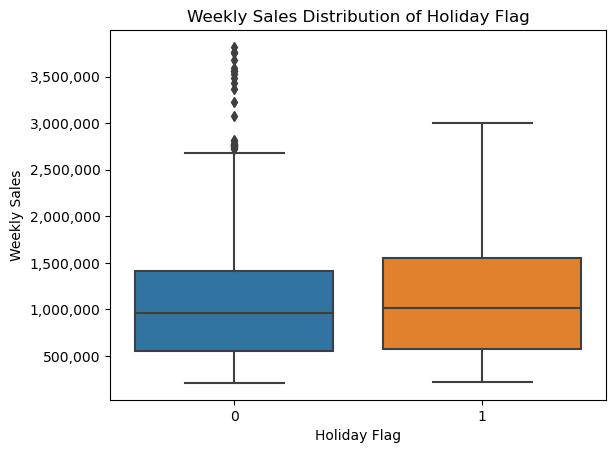

In [500]:
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Distribution of Holiday Flag')
plt.ylabel('Weekly Sales')
plt.xlabel('Holiday Flag')

plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))



There's a few interesting aspects of this distribution plot. Firstly, **Holiday Flag = 1** has a **higher median**, **3rd quartile**, and **maximum**. That enforces the findings from above where Holiday Flag = 1 has a higher average. What's really interesting is how the **Non-Holiday** weeks have *all* the **outliers**. Going into this visualization, I thought the **opposite** would have been the case. I'll continue my analysis to see why this may be.  

**Violin Plot** of **Weekly Sales** by **Holiday Flag** 

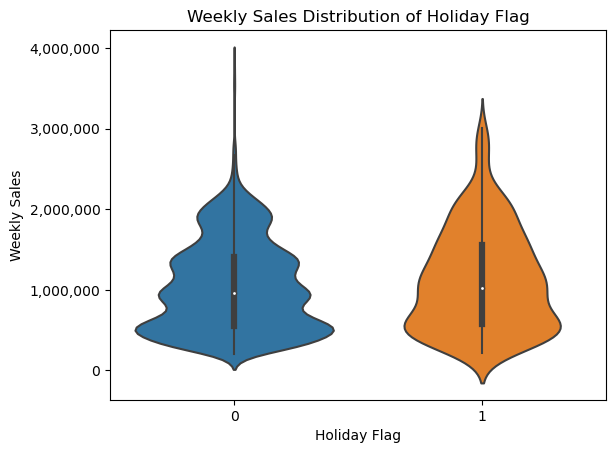

In [501]:
sns.violinplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Distribution of Holiday Flag')
plt.ylabel('Weekly Sales')
plt.xlabel('Holiday Flag')

plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))



This visualization **upholds** the findings from the previous plot. While **Holiday Flag = 0** has the **higher** outliers, **Holiday flag = 1** has a **wider** violin plot at higher sales levels. While having a lower minimum, **Holiday Flag = 1** also has a slimmer width at lower sales levels than **Holiday Flag = 0**. 

## Visualizations Involving **Holiday Name**

Comparing **Average Weekly Sales** of **Holiday Weeks** with **Non-Holidays Weeks**

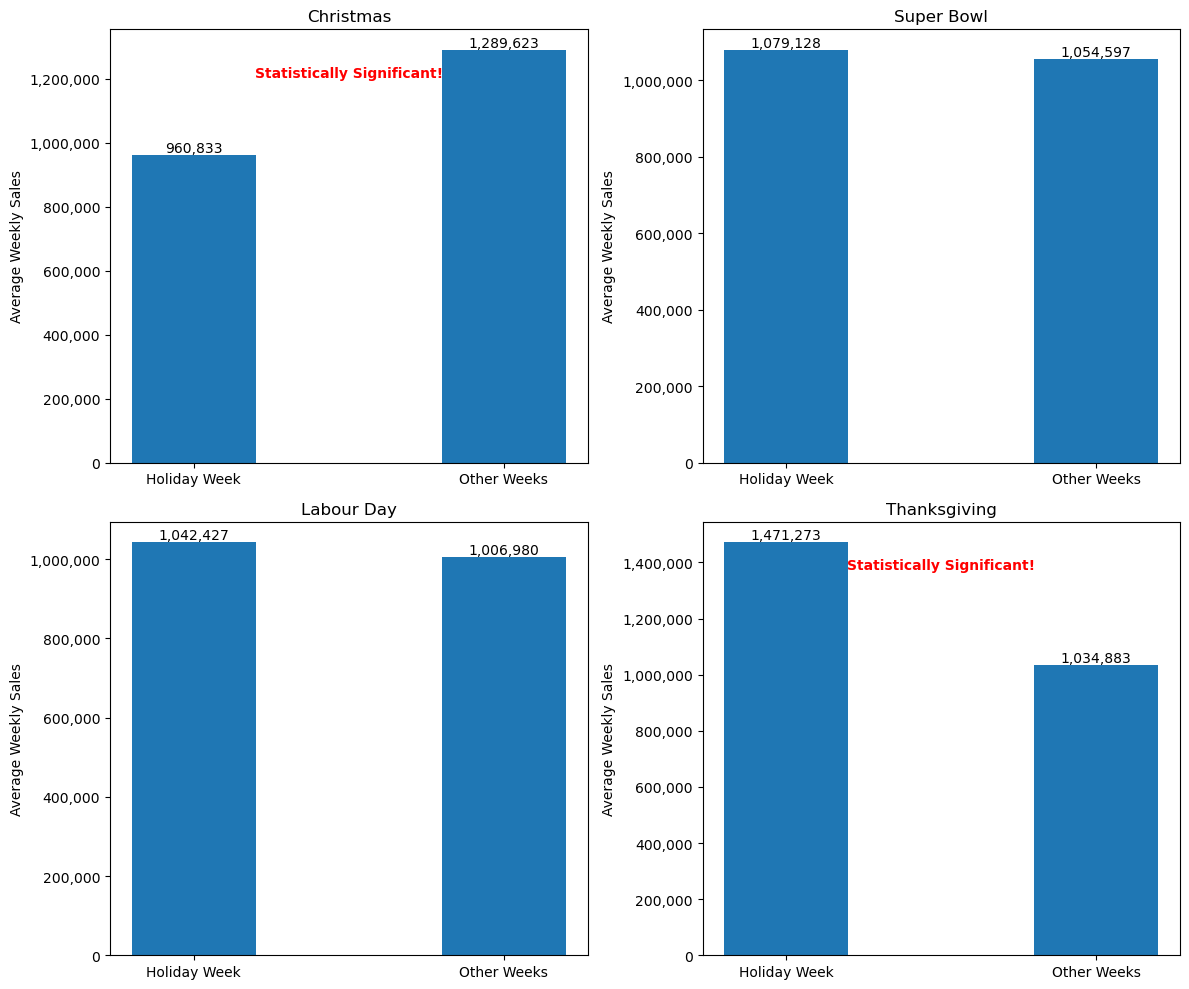

In [540]:
# Filter the data for the desired months
december_data = df[df['Month'] == 12]
february_data = df[df['Month'] == 2]
september_data = df[df['Month'] == 9]
november_data = df[df['Month'] == 11]

# List of holidays
holidays = ['Christmas', 'Super Bowl', 'Labour Day', 'Thanksgiving']

# Create a 2x2 subplot grid for the holidays
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

# Iterate over each holiday and corresponding subplot
for i, holiday in enumerate(holidays):
    subplot_row = i // 2
    subplot_col = i % 2
    ax = axes[subplot_row, subplot_col]

    if holiday == 'Christmas':
        holiday_data = december_data
    elif holiday == 'Super Bowl':
        holiday_data = february_data
    elif holiday == 'Labour Day':
        holiday_data = september_data
    else:
        holiday_data = november_data

    holiday_week = holiday_data[holiday_data['Holiday_Flag'] == 1]
    other_weeks = holiday_data[holiday_data['Holiday_Flag'] == 0]

    # Calculate the average sales for the holiday week and other weeks
    holiday_week_sales = holiday_week['Weekly_Sales'].mean()
    other_weeks_sales = other_weeks['Weekly_Sales'].mean()

     # Create a bar plot for the holiday week and other weeks
    x = [0, 1]
    bars = ax.bar(x, [holiday_week_sales, other_weeks_sales], width=0.4, align='center')

    ax.set_xticks(x)
    ax.set_xticklabels(['Holiday Week', 'Other Weeks'])
    # ax.set_xticklabels(x)
    ax.set_yticklabels(['{:,}'.format(int(y)) for y in ax.get_yticks()])
    ax.set_ylabel('Average Weekly Sales')
    ax.set_title(holiday)


    # Add data labels to the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                '{:,.0f}'.format(height), ha='center', va='bottom')

    # Perform t-test and calculate p-value
    t_statistic, p_value = stats.ttest_ind(holiday_week['Weekly_Sales'], other_weeks['Weekly_Sales'])
    # Add statistical significance annotation
    if p_value < 0.05:
        ax.annotate('Statistically Significant!', xy=(0.5, 0.9), xycoords='axes fraction',
                    ha='center', va='center', fontsize=10, fontweight='bold', color='red')

        

plt.tight_layout()


I'll discuss each plot one-by-one. Starting with the **Super Bowl** plot, there's about a **$45,000** difference between Super Bowl week and the rest of February. This isn't surprising to me as Super Bowl parties don't require a lot of extra purchases. Also, most of the extra purchases during this week may not be able to be bought at Walmart. Not every Walmart sells the right type of food and drinks that people buy for parties. 

For September, the **Labour Day** weeks have **slightly higher** Average Weekly Sales than the **Non-Labour Day** weeks. My hypothesis for this level of sales is that **consumer behavior** and **seasonal shopping considerations** negatively affect sales. Specifically, Labour Day is a holiday that is traditionally spent outside with family or traveling. As a result, consumer spending may be lower. Also, Labour Day is ushering in the beginning of Fall; school is starting up again and the Holidays are approaching. People may be saving up in anticipation of spending more in the upcoming months. 

For our November plot, **Thanksgiving** has a **statistically signficant higher** level of sales than the other weeks in November. I believe the reason for this high level of sales is due to people setting up their gatherings and **Black Friday** impacting sales. Firstly, people hosting parties need to purchase the proper materials for their friends and family. I don't believe that this is the main reason for such a large gap in sales. If it was, then the Super Bowl and Labour Day plots would have a larger difference in sales as well. Black Friday is likely the reason for the large gap in sales. As the nation's **largest retailer**, Walmart can be expected to have a large amount of Black Friday shoppers.

Our December chart is the **only** plot where the **Holiday week** has **lower sales** than the rest of the month. **Christmas** week actually has the lowest average sales out of all of our plots. The **Non-Holiday** weeks has the **2nd highest average sales** out of all the plots (1st is Thanksgiving). What are some potential reasons for this? Firstly, people may have gotten all their holiday shopping done by the time Christmas arrives. Also, the high levels of sales in the rest of December can be attributed to people shopping for the Holidays. Based on the 3rd plot in this file, there were large spikes of sales in November and December. I expected Christmas week to have the highest average sales, but it makes sense how the preceding weeks have the highest sales compared to the actual week of Christmas. 

Below, I'll continue to dive into how each Holiday interacts with Weekly Sales. 

**Weekly Sales** Distribution of **Holiday Weeks** vs **Non-Holiday Weeks**

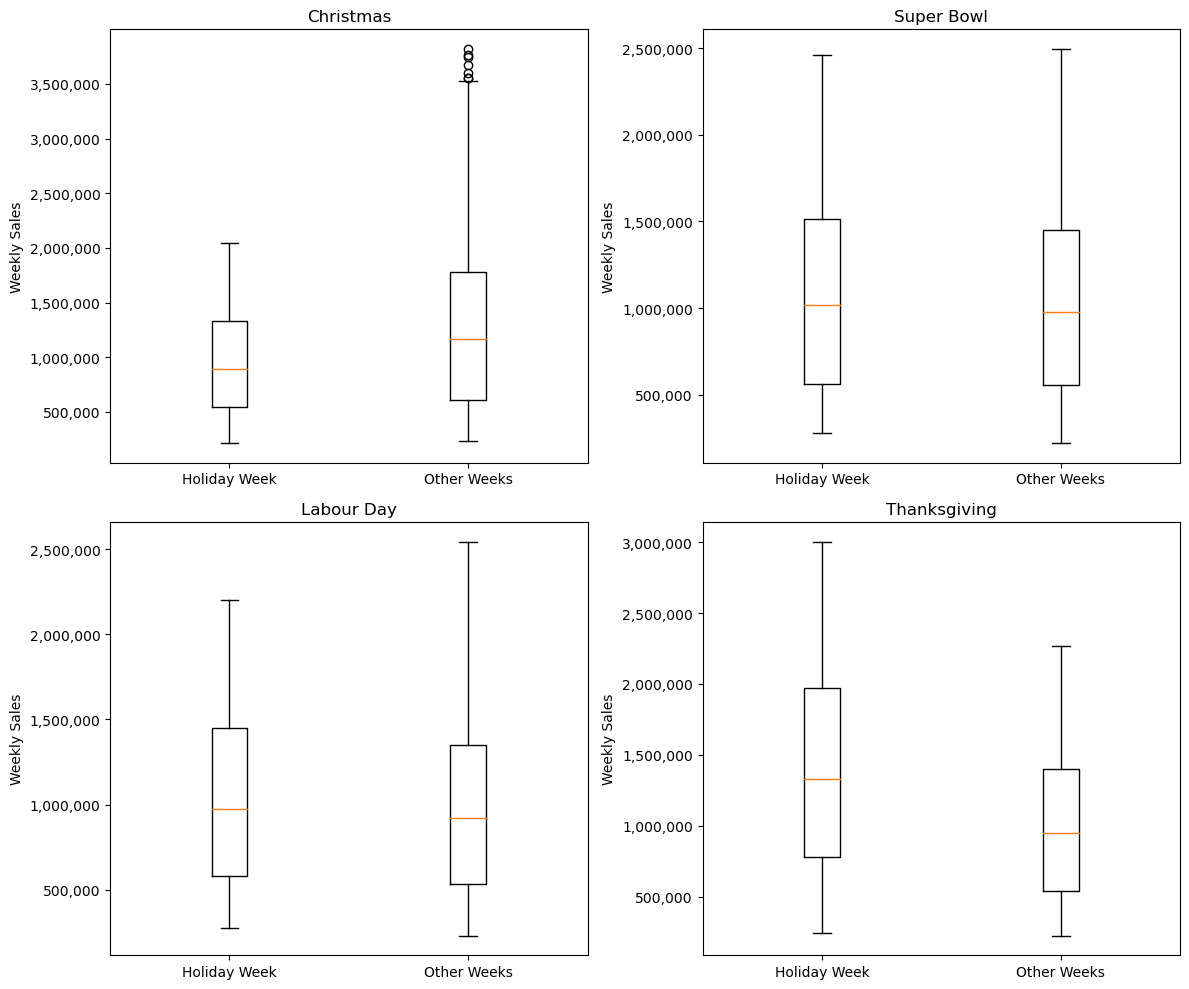

In [512]:
# Filter the data for the desired months
december_data = df[df['Month'] == 12]
february_data = df[df['Month'] == 2]
september_data = df[df['Month'] == 9]
november_data = df[df['Month'] == 11]

# List of holidays
holidays = ['Christmas', 'Super Bowl', 'Labour Day', 'Thanksgiving']

# Create a 2x2 subplot grid for the holidays
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterate over each holiday and corresponding subplot
for i, holiday in enumerate(holidays):
    # Select the subplot
    subplot_row = i // 2
    subplot_col = i % 2
    ax = axes[subplot_row, subplot_col]

    # Filter the data for the holiday week and other weeks
    if holiday == 'Christmas':
        holiday_data = december_data
    elif holiday == 'Super Bowl':
        holiday_data = february_data
    elif holiday == 'Labour Day':
        holiday_data = september_data
    elif holiday == 'Thanksgiving':
        holiday_data = november_data

    holiday_week = holiday_data[holiday_data['Holiday_Flag'] == 1]
    other_weeks = holiday_data[holiday_data['Holiday_Flag'] == 0]

    # Create a boxplot for the holiday week and other weeks
    boxplot_data = [holiday_week['Weekly_Sales'], other_weeks['Weekly_Sales']]
    ax.boxplot(boxplot_data)

    ax.set_xticklabels(['Holiday Week', 'Other Weeks'])
    ax.set_yticklabels(['{:,}'.format(int(y)) for y in ax.get_yticks()])
    ax.set_ylabel('Weekly Sales')
    ax.set_title(holiday)
   

plt.tight_layout()


These boxplots mainly reinforce the previous plot's findings. It also accentuates the difference in sales with Christmas and the other December weeks. It's interesting how the 'Other Weeks' in September have a higher maximum than Labour Day week. In the following plot, I'll create violin plots to further analyze the distribution of sales by Holiday Week. 

**Violin Plots** Comparing **Holiday Weeks** and **Non-Holiday Weeks**

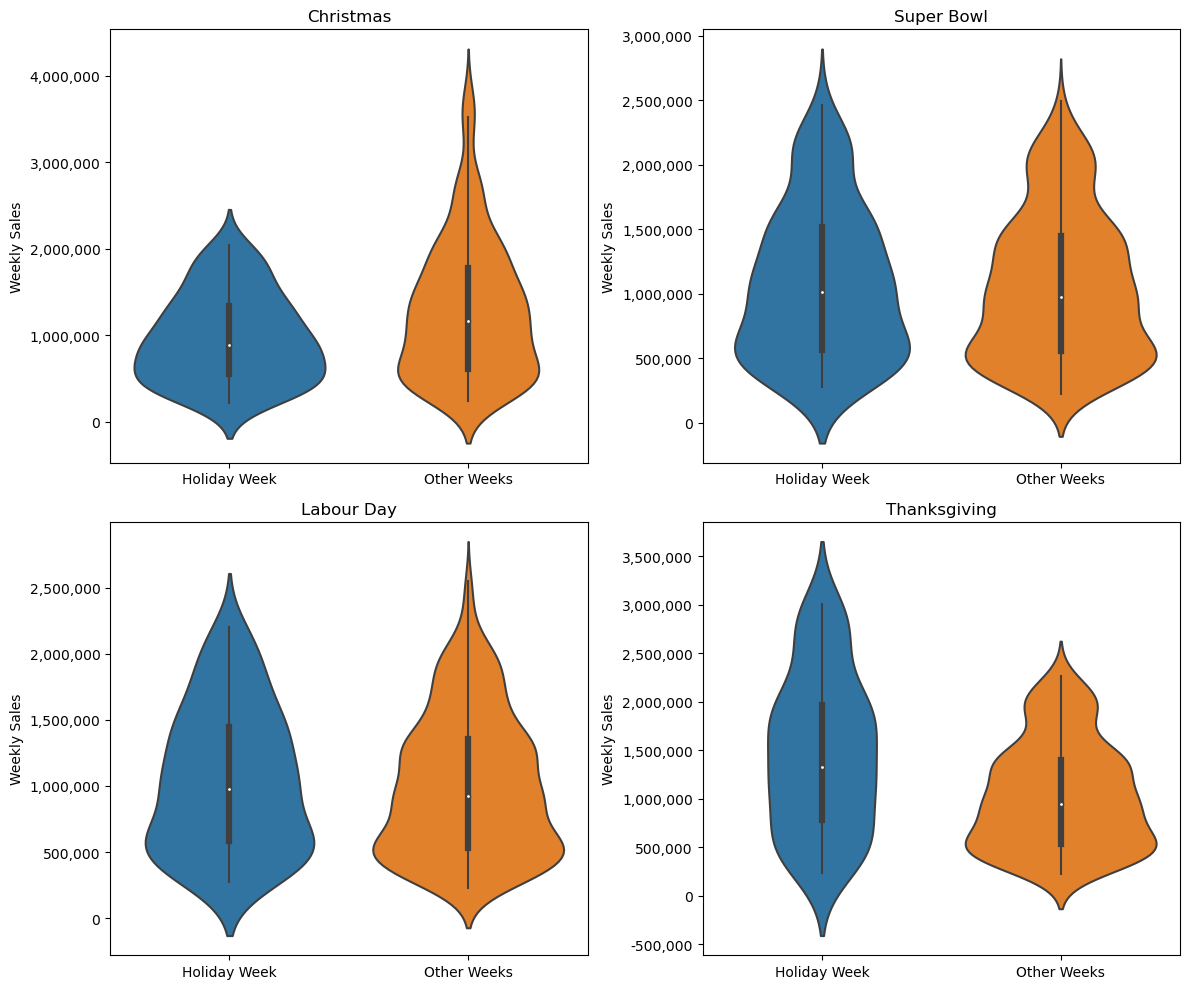

In [535]:
# Filter the data for the desired months
december_data = df[df['Month'] == 12]
february_data = df[df['Month'] == 2]
september_data = df[df['Month'] == 9]
november_data = df[df['Month'] == 11]

# List of holidays
holidays = ['Christmas', 'Super Bowl', 'Labour Day', 'Thanksgiving']

# Create a 2x2 subplot grid for the holidays
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterate over each holiday and corresponding subplot
for i, holiday in enumerate(holidays):
    # Select the subplot
    subplot_row = i // 2
    subplot_col = i % 2
    ax = axes[subplot_row, subplot_col]

    # Filter the data for the holiday week and other weeks
    if holiday == 'Christmas':
        holiday_data = december_data
    elif holiday == 'Super Bowl':
        holiday_data = february_data
    elif holiday == 'Labour Day':
        holiday_data = september_data
    elif holiday == 'Thanksgiving':
        holiday_data = november_data

    holiday_week = holiday_data[holiday_data['Holiday_Flag'] == 1]['Weekly_Sales']
    other_weeks = holiday_data[holiday_data['Holiday_Flag'] == 0]['Weekly_Sales']

    # Set the x-axis positions for the violins
    positions = [0, 1]

    # Create violin plots for the 'Weekly Sales' distribution
    sns.violinplot(data=[holiday_week, other_weeks], ax=ax)

    ax.set_xticks(positions)
    ax.set_xticklabels(['Holiday Week', 'Other Weeks'])
    ax.set_yticklabels(['{:,}'.format(int(y)) for y in ax.get_yticks()])
    ax.set_ylabel('Weekly Sales')
    ax.set_title(holiday)

plt.tight_layout()



Nothing stands out from the above plot that would change my analysis. Besides the December plot, all the 'Other Weeks' have the widest plots around $500,000. 

**Final thoughts on how Holidays affect sales**: The only Holiday which shows a distinct increase in sales is **Thanksgiving**. I believe that the large sales gap can be mainly attributed to **Black Friday** drawing in large numbers of shoppers. It's difficult to make any conclusive statements since we have no specific details about the Walmart stores in the dataset. Are they Walmart **Supercenters**? Are they smaller **grocery store** versions of Walmart? If the dataset has a large number of smaller stores, then Holidays will have less of an impact on the sales numbers. Analyzing Walmart data to see how Holidays affect sales may not make the most sense. I would want to compare sales from competitors such as **Target** and **Best Buy**.